- Analyses comparing the interaction between traits, responses and fMRI beta slope regressors

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 16})

Read in restricted behavioral data:

In [ ]:
res_behav_data = pd.read_csv('../data/RESTRICTED_esfinn_11_21_2021_19_19_35.csv')
res_behav_data.set_index("Subject", inplace=True)
res_behav_data.index = res_behav_data.index.map(str)
print(res_behav_data.shape)
res_behav_data.head()

Read in unrestricted behavioral data:

In [ ]:
unres_behav_data = pd.read_csv('../data/unrestricted_esfinn_11_21_2021_19_19_13.csv')
unres_behav_data.set_index("Subject", inplace=True)
unres_behav_data.index = unres_behav_data.index.map(str)
print(unres_behav_data.shape)
unres_behav_data.head()

Combine restricted and unrestricted behavioral data into a single dataframe:

In [ ]:
behav_data = pd.concat([res_behav_data, unres_behav_data], axis=1)
print(behav_data.shape)
behav_data.head()

Read in FMRI data, join into single dataframe, then join this with the larger dataframe:

In [ ]:
data_file_loc = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data'
sub_id_all = np.load(os.path.join(data_file_loc,'sub_ID_all.npy'))
sub_id_all = [str(i) for i in sub_id_all]
print(len(sub_id_all),sub_id_all[:5])

In [6]:
# load behavioral responses too - to identify missed/invalid trials later - 1 for "social", 0 for "nonsocial" and 9 for "unsure", nan for missed response
responses = np.load(os.path.join(data_file_loc,'responses.npy'))
responses.shape # subs *movies

(1048, 10)

In [7]:
# load slope regression coefficents for the fMRI data
coef_slope_rand = np.load(os.path.join(data_file_loc,'coefs_run_norm','slope_reg','coef_slopereg_runnorm_Random mechanical.npy'))
coef_slope_fish = np.load(os.path.join(data_file_loc,'coefs_run_norm','slope_reg','coef_slopereg_runnorm_Fishing.npy'))
coef_slope_coax = np.load(os.path.join(data_file_loc,'coefs_trial_norm','slope_reg','coef_slopereg_trialnorm_COAXING-B.npy'))
coef_slope_bill = np.load(os.path.join(data_file_loc,'coefs_trial_norm','slope_reg','coef_slopereg_trialnorm_BILLIARD-A.npy'))
coef_slope_all  = np.load(os.path.join(data_file_loc,'coef_slopereg_all.npy'))

print(coef_slope_rand.shape)
coef_slope_all.shape

(1048, 268)


(1048, 268, 2)

In [8]:
shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
pd.set_option('display.max_colwidth', None)
shen268_lbl.head()

,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
0,"{'coords': [14.083200000000005, 56.6944, -16.684799999999996], 'name': '92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex'}","{'coords': [9.599999999999994, 17.61882352941177, -19.53411764705882], 'name': '60.56% Subcallosal_Cortex; 38.73% Frontal_Orbital_Cortex'}","{'coords': [5.270633397312864, 35.03262955854126, -17.5278310940499], 'name': '58.54% Frontal_Medial_Cortex; 34.55% Subcallosal_Cortex'}","{'coords': [15.647840531561457, 34.18604651162792, -22.544850498338867], 'name': '54.15% Frontal_Pole; 41.86% Frontal_Orbital_Cortex'}","{'coords': [8.283887468030684, 46.05882352941177, -1.6700767263427139], 'name': '47.25% Paracingulate_Gyrus; 25.03% Cingulate_Gyrus_anterior_division; 16.35% Frontal_Medial_Cortex; 10.86% Frontal_Pole'}","{'coords': [14.581460674157299, 64.75280898876406, 3.682584269662925], 'name': '100.00% Frontal_Pole'}","{'coords': [30.41914191419142, 54.79537953795381, -3.3267326732673297], 'name': '100.00% Frontal_Pole'}","{'coords': [44.469325153374236, 46.095092024539866, -4.917177914110425], 'name': '99.85% Frontal_Pole'}","{'coords': [28.814814814814817, 51.163163163163176, 18.73473473473473], 'name': '100.00% Frontal_Pole'}","{'coords': [8.521081081081078, 53.28, 23.885405405405407], 'name': '48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus'}",...,"{'coords': [-10.399527186761233, 10.877068557919614, -8.056737588652481], 'name': '20.66% Subcallosal_Cortex; 19.95% Left_Putamen; 19.83% Left_Accumbens; 14.40% Left_Caudate; 13.81% no_label; 5.67% Frontal_Orbital_Cortex'}","{'coords': [-14.491582491582491, -3.54882154882155, 20.909090909090907], 'name': '55.03% Left_Caudate; 29.53% Left_Lateral_Ventrical; 11.07% Left_Thalamus'}","{'coords': [-24.77079107505071, 5.537525354969574, -0.07302231237322587], 'name': '96.96% Left_Putamen'}","{'coords': [-9.427230046948353, -25.539906103286384, -1.3755868544600958], 'name': '72.56% Left_Thalamus; 21.40% Brain-Stem; 5.58% no_label'}","{'coords': [-4.68474576271187, -10.2406779661017, 5.877966101694909], 'name': '82.71% Left_Thalamus; 13.90% Left_Lateral_Ventrical'}","{'coords': [-11.407792207792212, -25.563636363636363, 14.883116883116884], 'name': '61.82% Left_Thalamus; 31.43% Left_Lateral_Ventrical'}","{'coords': [-4.821052631578951, -21.51157894736842, -15.890526315789472], 'name': '71.16% Brain-Stem; 25.89% no_label'}","{'coords': [-4.227272727272734, -37.89772727272728, -53.26704545454545], 'name': '100.00% Brain-Stem'}","{'coords': [-6.9375, -33.13068181818181, -39.34659090909091], 'name': '99.15% Brain-Stem'}","{'coords': [-5.697885196374628, -18.966767371601208, -36.81570996978852], 'name': '100.00% Brain-Stem'}"


In [9]:
# for comparison with the other main figure if needed
nodes_coaxbill_rand_all = np.load(os.path.join(data_file_loc,'nodes_coaxbill_rand_all.npy')) # sig nodes hihglighted in the first S>NS GLM
len(np.where(nodes_coaxbill_rand_all)[0])

74

## Directly compare "Social" and "Non-social" using a linear regression for RANDOM MECH (and maybe FISHING)


Procedure:
1. compare the models: bold = b0+b1*response, bold = b0 + b1*response + b2*traits + b3*traits*responses, and bold = b0 + b1*response + b2*traits + b3*traits*responses
2. select nodes for which the second model (or third depending on what we're looking for) is better AIC-wise
3. extract coeffts for these nodes alone (redo another LR just for these nodes), fdr-correct and check nodes for significance.


In [10]:
from multipy.fdr import lsu
from pymer4.models import Lm

In [66]:
## RANDOM MECH
# find out in which nodes AIC decreases with trait terms
# model 1: factor: responses
# model 2: factor: responses, traits (no interactions)
# model 3: factors: traits, responses, their interaction

coef_nodes_rand_lr_model1, pval_nodes_rand_lr_model1 = [np.empty((268, )) for _ in range(2)]
coef_nodes_rand_lr_model2, pval_nodes_rand_lr_model2 = [np.empty((268,2)) for _ in range(2)]
coef_nodes_rand_lr_model3, pval_nodes_rand_lr_model3 = [np.empty((268,3)) for _ in range(2)]
coef_nodes_rand_lr_model1[:],pval_nodes_rand_lr_model1[:],coef_nodes_rand_lr_model2[:],pval_nodes_rand_lr_model2[:],coef_nodes_rand_lr_model3[:],pval_nodes_rand_lr_model3[:]  = [np.nan]*6

aic_nodes_rand_lr = np.empty((268,3))
aic_nodes_rand_lr[:] = np.nan

for n in range(268): 
    if n% 50 ==0:
        print('node',n)
    fMRI_data = pd.DataFrame({'Subject':sub_id_all,'slopeReg_node':coef_slope_rand[:,n], 'responses':responses[:,4]})
    fMRI_data.set_index("Subject", inplace=True)
    data = fMRI_data.join(behav_data, how='inner') # join betas and trait info
    data.reset_index(inplace=True)
    data = data.loc[:,['Subject','slopeReg_node','responses','ASR_Intn_T']]
    
    d = data.loc[(data['responses']==0)|(data['responses']==1),:]
    ind = (~np.isnan(d['slopeReg_node'])) & (~np.isnan(d['ASR_Intn_T'])) & (~np.isnan(d['responses']))
    d = d.loc[ind,:]
    
    model1 = Lm("slopeReg_node ~ responses", data=d)
    model1.fit(summary = False, verbose = False)
    
    model2 = Lm("slopeReg_node ~ responses + ASR_Intn_T", data=d)
    model2.fit(summary = False, verbose = False)

    model3 = Lm("slopeReg_node ~ responses + ASR_Intn_T + responses*ASR_Intn_T", data=d)
    model3.fit(summary = False, verbose = False)
    #model.fit(factors={"response":["Social","Unsure"]},summary = False, verbose = False) # Unsure > Social
   
    if n == 0:
        print(model1.fit())#factors={"response":["Social","Unsure"]}))
        print(model2.fit())
        print(model3.fit())

    if (len(model1.warnings) == 0):
        coef_nodes_rand_lr_model1[n] = model1.coefs['Estimate'][1]
        pval_nodes_rand_lr_model1[n] = model1.coefs['P-val'][1]
        aic_nodes_rand_lr[n,0] = model1.AIC

    if (len(model2.warnings) == 0):
        for ind in range(2):
            coef_nodes_rand_lr_model2[n,ind] = model2.coefs['Estimate'][ind+1]
            pval_nodes_rand_lr_model2[n,ind] = model2.coefs['P-val'][ind+1]
        aic_nodes_rand_lr[n,1] = model2.AIC

    if (len(model3.warnings) == 0):
        for ind in range(3):
            coef_nodes_rand_lr_model3[n,ind] = model3.coefs['Estimate'][ind+1]
            pval_nodes_rand_lr_model3[n,ind] = model3.coefs['P-val'][ind+1]
        aic_nodes_rand_lr[n,2] = model3.AIC

pval_nodes_fdr_rand_lr_model1 = lsu(pval_nodes_rand_lr_model1,q=.05)

pval_nodes_fdr_rand_lr_model2 = np.empty_like(pval_nodes_rand_lr_model2)
pval_nodes_fdr_rand_lr_model2[:]=np.nan
for ind in range(2):
    pval_nodes_fdr_rand_lr_model2[:,ind] = lsu(pval_nodes_rand_lr_model2[:,ind],q=.05)

pval_nodes_fdr_rand_lr_model3 = np.empty_like(pval_nodes_rand_lr_model3)
pval_nodes_fdr_rand_lr_model3[:]=np.nan
for ind in range(3):
    pval_nodes_fdr_rand_lr_model3[:,ind] = lsu(pval_nodes_rand_lr_model3[:,ind],q=.05)


node 0
Formula: slopeReg_node~responses

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 674	 R^2: 0.000	 R^2_adj: -0.001

Log-likelihood: -810.704 	 AIC: 1625.408	 BIC: 1634.434

Fixed effects:

           Estimate  2.5_ci  97.5_ci     SE   DF  T-stat  P-val  Sig
Intercept     0.221   0.156    0.287  0.033  672   6.646  0.000  ***
responses     0.046  -0.135    0.228  0.092  672   0.503  0.615     
Formula: slopeReg_node~responses+ASR_Intn_T

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 674	 R^2: 0.004	 R^2_adj: 0.001

Log-likelihood: -809.578 	 AIC: 1625.156	 BIC: 1638.696

Fixed effects:

            Estimate  2.5_ci  97.5_ci     SE   DF  T-stat  P-val Sig
Intercept      0.427   0.150    0.703  0.141  671   3.027  0.003  **
responses      0.053  -0.129    0.234  0.092  671   0.571  0.569    
ASR_Intn_T    -0.004  -0.010    0.001  0.

Text(0.5, 1.0, 'RANDOM MECH')

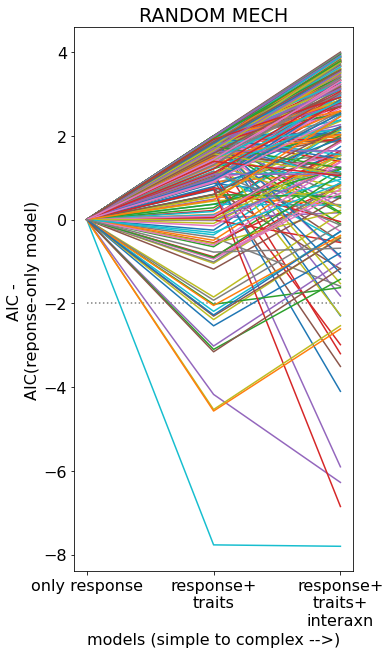

In [67]:
aic_nodes_rand_lr1 = np.empty_like(aic_nodes_rand_lr)
for i in [2,1,0]:
    aic_nodes_rand_lr1[:,i] = aic_nodes_rand_lr[:,i]- aic_nodes_rand_lr[:,0]
    #aic_nodes_corr_fish_lr[:,i] = aic_nodes_corr_fish_lr[:,i]- aic_nodes_corr_fish_lr[:,0]

plt.figure(1,figsize=(5,10))
plt.plot(aic_nodes_rand_lr1.T)
plt.xticks(range(3),['only response','response+\ntraits','response+\ntraits+\ninteraxn'])
plt.hlines(-2,0,2,'grey',ls='dotted')
plt.ylabel('AIC - \nAIC(reponse-only model)')
plt.xlabel('models (simple to complex -->)')
plt.title('RANDOM MECH')


In [157]:
rand_nodes_add_traits = np.where((aic_nodes_rand_lr1[:,1]<-2))[0] #  response only v. trait main
print(len(nodes_traits),rand_nodes_add_traits)

rand_nodes_add_traits_interaxn = np.where(aic_nodes_rand_lr1[:,2]<-2)[0] #  trait main v. trait main+int
print(len(nodes_traits),rand_nodes_add_traits_interaxn)

0 [ 29 104 110 119 128 132 134 241 242 245 248 251 255 260]
0 [ 20  25  33  83  84  88 104 119 120 223 248 251]


In [132]:
# response only v. responses+ traits

def get_sig_nodes(pval,nodes):
    try:
        terms =  pval.shape[1]
    except:
        terms = 1
        pval = pval[:,np.newaxis]
    #print(terms)
    all_nodes =  np.empty((268,terms))
    all_nodes[:] = np.nan
    for i in range(terms):
        all_nodes[nodes,i] = pval[nodes,i]
    return [['term '+str(i+1),np.where(all_nodes[:,i]==1)[0]] for i in range(terms)]

print('FDR-corr. response-only vs. responses+traits')
print('response only:')
print(get_sig_nodes(pval_nodes_fdr_rand_lr_model1, rand_nodes_add_traits))
print('\nresponse + traits:')
print(get_sig_nodes(pval_nodes_fdr_rand_lr_model2, rand_nodes_add_traits))

# response only v. responses+ traits + interaction
'''print('\n\nFDR-corr. response-only vs. responses+traits+interaction')
print('response only:')
print(get_sig_nodes(pval_nodes_fdr_rand_lr_model1,rand_nodes_add_traits_interaxn))
print('\nresponse + traits + interactionn:')
get_sig_nodes(pval_nodes_fdr_rand_lr_model3,rand_nodes_add_traits_interaxn)'''

FDR-corr. response-only vs. responses+traits
response only:
[['term 1', array([ 29, 104, 110, 241, 245, 251, 255, 260])]]

response + traits:
[['term 1', array([ 29, 104, 110, 241, 245, 248, 251, 255, 260])], ['term 2', array([], dtype=int64)]]


"print('\n\nFDR-corr. response-only vs. responses+traits+interaction')\nprint('response only:')\nprint(get_sig_nodes(pval_nodes_fdr_rand_lr_model1,rand_nodes_add_traits_interaxn))\nprint('\nresponse + traits + interactionn:')\nget_sig_nodes(pval_nodes_fdr_rand_lr_model3,rand_nodes_add_traits_interaxn)"

- So no significat term for 'traits' at the corrected level, and we get one additional sig. term for  'responses' - prob because it improves the model fit 
- How about at the uncorrected thresholds?


In [137]:
#response only v. responses+ traits
print('Unc. response-only vs. responses+traits')
print('response only:')
print(get_sig_nodes(pval_nodes_rand_lr_model1<.05,rand_nodes_add_traits))
print('\nresponse + traits:')
print(get_sig_nodes(pval_nodes_rand_lr_model2<.05,rand_nodes_add_traits))

# response only v. responses+ traits + interaction
'''print('\n\nUnc. response-only vs. responses+traits+interaction')
print('response only:')
print(get_sig_nodes(pval_nodes_rand_lr_model1<.05,rand_nodes_add_traits_interaxn))
print('\nresponse + traits + interactionn:')
get_sig_nodes(pval_nodes_rand_lr_model3<.05,rand_nodes_add_traits_interaxn)'''


Unc. response-only vs. responses+traits
response only:
[['term 1', array([ 29, 104, 110, 241, 245, 248, 251, 255, 260])]]

response + traits:
[['term 1', array([ 29, 104, 110, 241, 245, 248, 251, 255, 260])], ['term 2', array([ 29, 104, 110, 119, 128, 132, 134, 241, 242, 245, 248, 251, 255,
       260])]]


"print('\n\nUnc. response-only vs. responses+traits+interaction')\nprint('response only:')\nprint(get_sig_nodes(pval_nodes_rand_lr_model1<.05,rand_nodes_add_traits_interaxn))\nprint('\nresponse + traits + interactionn:')\nget_sig_nodes(pval_nodes_rand_lr_model3<.05,rand_nodes_add_traits_interaxn)"

- There are several nodes showing a significant 'traits' term but at the unc. threshold

In [138]:
# unc. threshold so don't take to heart. what are these regions though?
for n in rand_nodes_add_traits:
    print(n+1,eval(shen268_lbl[str(n+1)][0])['name'])


30 53.27% Superior_Frontal_Gyrus; 44.39% Middle_Frontal_Gyrus
105 100.00% no_label
111 87.65% no_label; 10.29% Occipital_Fusiform_Gyrus
120 89.00% Right_Lateral_Ventricle; 9.50% no_label
129 100.00% Brain-Stem
133 100.00% Brain-Stem
135 96.97% Frontal_Orbital_Cortex
242 100.00% no_label
243 93.23% no_label; 6.77% Brain-Stem
246 100.00% no_label
249 100.00% no_label
252 98.43% no_label
256 74.89% no_label; 25.11% Brain-Stem
261 96.96% Left_Putamen


- mostly brainstem regions. Maybe more power with ALL MOVIES?

# ALL MOVIES : Directly compare "Social" and "Non-social" using lr for ALL MOVIES


Procedure:
1. compare the models: bold = b0+b1*response, bold = b0 + b1*response + b2*traits + b3*traits*responses, and bold = b0 + b1*response + b2*traits + b3*traits*responses - subject as random factor in all models
2. select nodes for which the second model (or third depending on what we're looking for) is better AIC-wise
3. extract coeffts for these nodes alone (redo another LR just for these nodes), fdr-correct and check nodes for significance.

In [139]:
# first of all, best to remove subjects with < 10 responses for power in general
count_resp = np.zeros((responses.shape[0],))
for i in range(responses.shape[0]):
    count_resp[i] = len(np.where(~np.isnan(responses[i,:]))[0])
subs_10resp = np.where(count_resp == 10)[0]
len(subs_10resp)

814

In [140]:
# creating a 3D array of beta coeffs across movies from individual movie files
all_coefs = np.zeros((1048,268,10))

vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical","Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]
for m in range(10):
    fileName =  os.path.join(data_file_loc,'coefs_run_norm','slope_reg',f'coef_slopereg_runnorm_{vidnames[m]}.npy')
    all_coefs[:,:,m] = np.load(fileName)
    #print(dat.shape)

In [141]:
from pymer4.models import Lm
from multipy.fdr import lsu
#from pymer4.models import Lmer
import time

In [235]:
# same analysis as above, all nodes
# ALL MOVIES

coef_nodes_all_model1,   pval_nodes_all_model1    = [np.empty((268,)) for _ in range(2)]
coef_nodes_all_model1[:],pval_nodes_all_model1[:] = [np.nan] *2

coef_nodes_all_model2,   pval_nodes_all_model2    = [np.empty((268,2)) for _ in range(2)]
coef_nodes_all_model2[:],pval_nodes_all_model2[:] = [np.nan] *2

coef_nodes_all_model3,   pval_nodes_all_model3    = [np.empty((268,3)) for _ in range(2)]
coef_nodes_all_model3[:],pval_nodes_all_model3[:] = [np.nan] *2

aic_nodes_all_lme = np.empty((268,3))
aic_nodes_all_lme[:] = np.nan

pval_nodes_fdr_all_model1 = np.empty_like(pval_nodes_all_model1)
pval_nodes_fdr_all_model1[:] = np.nan

pval_nodes_fdr_all_model2 = np.empty_like(pval_nodes_all_model2)
pval_nodes_fdr_all_model2[:] = np.nan

pval_nodes_fdr_all_model3 = np.empty_like(pval_nodes_all_model3)
pval_nodes_fdr_all_model3[:] = np.nan

nresp = [len(np.where(~np.isnan(responses[i,:]))[0]) for i in range(responses.shape[0])]
start_time = time.time()
for n in range(268):
    if n% 50 ==0:
        print(f'node_ind  {n}, time taken: {time.time()-start_time:.2f}')
    
    data = pd.DataFrame({})#columns = ['Subject','coef','response','movie'])
    for m in range(10):
        #fMRI_data = pd.DataFrame({'coefs': all_coefs[subs_10resp,n,m],'response':responses[subs_10resp,m], 'subID':sub_id_all[subs_10resp], 'movie':np.repeat(m,len(subs_10resp))})
        fMRI_data = pd.DataFrame({'Subject':sub_id_all,'coef': all_coefs[:,n,m], 'response': responses[:,m],'nresp':nresp, 'movie': np.repeat(m,1048)})
        fMRI_data = fMRI_data.loc[fMRI_data['nresp']==10,:]
        fMRI_data.set_index("Subject", inplace=True)
        data_temp = fMRI_data.join(behav_data['ASR_Intn_T'], how='inner') # join betas and trait info
        data = data.append(data_temp)#,ignore_index=True)
    data.reset_index(inplace=True)
    #if n == 0:
    #    print(data.shape)
    #    print(data.head())
    
    #d = data.loc[data['responses']==10,:]
    inds = ~np.isnan(data['coef']) & ~np.isnan(data['ASR_Intn_T']) & (data['response']!=9) # find rows where neither x or y is NaN
    data = data.loc[inds,:]
    # Calculate and print correlations
    
    #model1 = Lmer('coef ~  response + (1|movie)', data=data) # ff: mean response, rf:subjID
    model1 = Lm('coef ~  response', data=data) # ff: mean response, rf:subjID
    model1.fit(summary = False, verbose = False, no_warnings = True)
    #model.fit(factors={"response":["Non-social","Social"]},summary = False, verbose = False)

    #model2 = Lmer('coef ~  response + ASR_Intn_T + (1|movie)', data=data) # ff: mean response, rf:subjID
    model2 = Lm('coef ~  response + ASR_Intn_T', data=data) # ff: mean response, rf:subjID
    model2.fit(summary = False, verbose = False, no_warnings = True)

    #model3 = Lmer('coef ~  response + ASR_Intn_T + response*ASR_Intn_T + (1|movie) ', data=data) # ff: mean response, rf:subjID
    model3 = Lm('coef ~  response + ASR_Intn_T + response*ASR_Intn_T', data=data) # ff: mean response, rf:subjID
    model3.fit(summary = False, verbose = False, no_warnings = True)

    #model.fit(summary = False, verbose = False)
    if (len(model1.warnings) == 0):
        coef_nodes_all_model1[n] = model1.coefs['Estimate'][1]
        pval_nodes_all_model1[n]= model1.coefs['P-val'][1]
        aic_nodes_all_lme[n,0] = model1.AIC

    if (len(model2.warnings) == 0):
        for ind in range(2):
            coef_nodes_all_model2[n,ind] = model2.coefs['Estimate'][ind+1]
            pval_nodes_all_model2[n,ind] = model2.coefs['P-val'][ind+1]
        aic_nodes_all_lme[n,1] = model2.AIC

    if (len(model3.warnings) == 0):
        for ind in range(3):
            coef_nodes_all_model3[n,ind] = model3.coefs['Estimate'][ind+1]
            pval_nodes_all_model3[n,ind] = model3.coefs['P-val'][ind+1]
        aic_nodes_all_lme[n,2] = model3.AIC

pval_nodes_fdr_all_model1 = lsu(pval_nodes_all_model1,q=.05)

for ind in range(2):
    pval_nodes_fdr_all_model2[:,ind] = lsu(pval_nodes_all_model2[:,ind],q=.05)

for ind in range(3):
    pval_nodes_fdr_all_model3[:,ind] = lsu(pval_nodes_all_model3[:,ind],q=.05)
 

node_ind  0, time taken: 0.00
node_ind  50, time taken: 4.84
node_ind  100, time taken: 9.34
node_ind  150, time taken: 14.62
node_ind  200, time taken: 19.58
node_ind  250, time taken: 24.40


In [236]:
aic_nodes_all_lme1 = np.empty((268,3))
aic_nodes_all_lme1[:] = np.nan
for i in [2,1,0]:
    aic_nodes_all_lme1[:,i] = aic_nodes_all_lme[:,i]- aic_nodes_all_lme[:,0]


Text(0.5, 1.0, 'ALL MOVIES (linear regressions)')

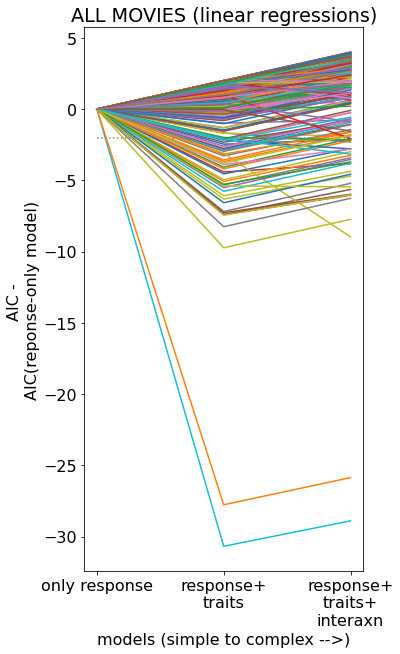

In [237]:
plt.figure(1,figsize=(5,10))
plt.plot(aic_nodes_all_lme1.T)
plt.xticks(range(3),['only response','response+\ntraits','response+\ntraits+\ninteraxn'])
plt.hlines(-2,0,2,'grey',ls='dotted')
plt.ylabel('AIC - \nAIC(reponse-only model)')
plt.xlabel('models (simple to complex -->)')
plt.title('ALL MOVIES (linear regressions)')


In [156]:
allmovies_nodes_add_traits = np.where((aic_nodes_all_lme1[:,1]<-2))[0] #  response only v. trait main
print(len(nodes_traits),allmovies_nodes_add_traits)

allmovies_nodes_add_traits_interaxn = np.where(aic_nodes_all_lme1[:,2]<-2)[0] #  trait main v. trait main+int
print(len(nodes_traits),allmovies_nodes_add_traits_interaxn)


0 [  0  22  23  25  31  40  43  45  48  49  61  67  68  71  90 104 105 106
 107 118 121 138 153 160 161 166 171 174 177 178 179 180 197 199 206 208
 217 222 225 229 238 248 249 251]
0 [  0  22  23  24  25  40  43  48  49  68  71 107 118 121 138 160 166 172
 174 177 178 179 180 197 208 222 225 229 233 248 251]


In [161]:
def intersection(lst1, lst2):
    
    if type(lst1) != 'list':
        lst1 = list(lst1)
    
    if type(lst2) != 'list':
        lst2 = list(lst2)
    
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

intersection (allmovies_nodes_add_traits, rand_nodes_add_traits)

[104, 248, 251]

In [167]:
print('FDR-corr. response-only vs. responses+traits')
print('response only:')
print(get_sig_nodes(pval_nodes_fdr_all_model1, allmovies_nodes_add_traits))
print('\nresponse + traits:')
print(get_sig_nodes(pval_nodes_fdr_all_model2, allmovies_nodes_add_traits))


#response only v. responses+ traits
print('\n\nUnc. response-only vs. responses+traits')
print('response only:')
print(get_sig_nodes(pval_nodes_all_model2<.05,allmovies_nodes_add_traits))
print('\nresponse + traits:')
print(get_sig_nodes(pval_nodes_all_model2<.05,allmovies_nodes_add_traits))


FDR-corr. response-only vs. responses+traits
response only:
[['term 1', array([  0,  22,  23,  25,  31,  40,  43,  45,  48,  49,  67,  68,  71,
        90, 104, 105, 106, 107, 118, 121, 138, 153, 160, 161, 166, 174,
       177, 178, 179, 180, 197, 199, 206, 208, 217, 222, 229, 238, 248,
       249, 251])]]

response + traits:
[['term 1', array([  0,  22,  23,  25,  31,  40,  43,  45,  48,  49,  67,  68,  71,
        90, 104, 105, 106, 107, 118, 121, 138, 153, 160, 161, 166, 174,
       177, 178, 179, 180, 197, 199, 206, 208, 217, 222, 229, 238, 248,
       249, 251])], ['term 2', array([ 49, 251])]]


Unc. response-only vs. responses+traits
response only:
[['term 1', array([  0,  22,  23,  25,  31,  40,  43,  45,  48,  49,  67,  68,  71,
        90, 104, 105, 106, 107, 118, 121, 138, 153, 160, 161, 166, 174,
       177, 178, 179, 180, 197, 199, 206, 208, 217, 222, 229, 238, 248,
       249, 251])], ['term 2', array([  0,  22,  23,  25,  31,  40,  43,  45,  48,  49,  61,  67,  68,
     

## COAX-BILL

- If coax-bill or all movies overlap with RANDOM MECH at least, what we did makes sense - too weak otherwise

In [228]:
# same analysis as above, all nodes
# COAX-BILL
corrtype = 'Spearman' # 'Pearson'
x = "slopeReg_diff"
#y = "Loneliness_Unadj"
y = "ASR_Intn_T"

corr_nodes_coaxbill,   pval_nodes_coaxbill    =  [np.empty((268,)) for _ in range(2)]
corr_nodes_coaxbill[:],pval_nodes_coaxbill[:] = [np.nan] *2

pval_nodes_fdr_coaxbill = np.empty_like(pval_nodes_coaxbill)
pval_nodes_fdr_coaxbill[:] = np.nan

sig_nodes = np.where(nodes_coaxbill_rand_all)[0] # nodes sig in the main GLM analysis

for n in sig_nodes:
#for n in range(268): 
    #if n% 50 ==0:
    print('node',n)

    fMRI_data = pd.DataFrame({'Subject':sub_id_all,'slopeReg_diff':coef_slope_coax[:,n]-coef_slope_bill[:,n], 'responses':(responses[:,0]==1)&(responses[:,1]==0)})
    fMRI_data.set_index("Subject", inplace=True)
    data = fMRI_data.join(behav_data, how='inner') # join betas and trait info
    #if n == 0:
    #    print(data.shape)
    #    print(data.head())
    
    d = data.loc[data['responses']==True,:]
    inds = ~np.isnan(d[x]) & ~np.isnan(d[y]) # find rows where neither x or y is NaN
    
    # Calculate and print correlations
    if corrtype == 'Pearson':
        corr_nodes_coaxbill[n], pval_nodes_coaxbill[n] = stats.pearsonr(d[x][inds], d[y][inds])
    elif corrtype =='Spearman':
        corr_nodes_coaxbill[n], pval_nodes_coaxbill[n] = stats.spearmanr(d[x][inds], d[y][inds])

pval_nodes_fdr_coaxbill[sig_nodes] = lsu(pval_nodes_coaxbill[sig_nodes],q=.05)
pval_ = lsu(pval_nodes_coaxbill[sig_nodes],q=.05)



node 8
node 9
node 11
node 13
node 15
node 18
node 19
node 21
node 28
node 30
node 48
node 49
node 64
node 65
node 66
node 68
node 69
node 70
node 72
node 73
node 75
node 77
node 80
node 89
node 99
node 101
node 103
node 104
node 110
node 111
node 112
node 113
node 115
node 116
node 118
node 127
node 144
node 146
node 148
node 150
node 152
node 154
node 155
node 156
node 182
node 184
node 190
node 191
node 196
node 197
node 198
node 199
node 200
node 203
node 205
node 206
node 207
node 208
node 209
node 211
node 212
node 213
node 224
node 235
node 237
node 239
node 240
node 241
node 244
node 245
node 246
node 251
node 252
node 255


In [179]:
print('Nodes sig. at the corrected threshold:', np.where(pval_nodes_fdr_coaxbill[sig_nodes]))
print('Nodes sig. at the unc. threshold:',sig_nodes[pval_nodes_coaxbill[sig_nodes] <.05],',p-values:',pval_nodes_coaxbill[sig_nodes][pval_nodes_coaxbill[sig_nodes] <.05])

Nodes sig. at the corrected threshold: (array([], dtype=int64),)
Nodes sig. at the unc. threshold: [ 68 111 191 205 208 209 244 255] ,p-values: [0.00716444 0.01068655 0.00839596 0.01731321 0.03139023 0.04192806
 0.03429798 0.03104648]


In [188]:
# intersection with the other analyses?

print(intersection(sig_nodes[pval_nodes_coaxbill[sig_nodes] <.05],rand_nodes_add_traits))
print(intersection(sig_nodes[pval_nodes_coaxbill[sig_nodes] <.05],rand_nodes_add_traits_interaxn))
print(intersection(sig_nodes[pval_nodes_coaxbill[sig_nodes] <.05],allmovies_nodes_add_traits))
print(intersection(sig_nodes[pval_nodes_coaxbill[sig_nodes] <.05],allmovies_nodes_add_traits_interaxn))

[eval(shen268_lbl[str(n+1)][0])['name'] for n in [68,208]]

[255]
[]
[68, 208]
[68, 208]


['48.69% Middle_Temporal_Gyrus_temporooccipital_part; 29.07% Lateral_Occipital_Cortex_inferior_division; 22.09% Inferior_Temporal_Gyrus_temporooccipital_part',
 '78.86% Lateral_Occipital_Cortex_inferior_division; 15.18% Middle_Temporal_Gyrus_temporooccipital_part; 5.84% Inferior_Temporal_Gyrus_temporooccipital_part']

In [279]:
print('COAX-BILL')
print('p corr. "Social"- "Non-social" responders',np.where(pval_nodes_corr_coaxbill))
print('p unc. "Social" - "Non-social" responders',np.where(pval_nodes_coaxbill<.05))
print('rand:',rand_sig_interaction_nodes[:,0])


# Any overlap between RAND and COAX-BILL?
print('\nnodes where diff between correlation are sig in both COAX-BILL and RAND (linreg):',intersection(rand_sig_interaction_nodes[:,0],np.where(pval_nodes_coaxbill<.05)[0]))
#print('nodes where diff between correlation are sig in both COAX-BILL and RAND:',np.where((pCorrs_rand<.05)          & (pval_nodes_coaxbill<.05))[0])
#print('nodes where "Social" correlations are sig in both COAX-BILL and RAND:',   np.where((pval_nodes_rand[:,1]<.05) & (pval_nodes_coaxbill<.05))[0])



COAX-BILL
p corr. "Social"- "Non-social" responders (array([], dtype=int64),)
p unc. "Social" - "Non-social" responders (array([ 31,  32,  34,  39,  40,  59,  68,  92, 107, 111, 114, 124, 138,
       172, 191, 202, 204, 205, 208, 209, 244, 248, 249, 255]),)
rand: [ 20.  25.  33.  83.  84.  88. 120. 223.]

nodes where diff between correlation are sig in both COAX-BILL and RAND (linreg): []


In [74]:
intersection(np.where(nodes_coaxbill_rand_all)[0],np.where(pval_nodes_coaxbill<.05)[0])

[68, 111, 205, 208, 209, 244, 255]

# ALL MOVIES - run-wise estimates

In [190]:
print('ALL MOVIES')

print('p corr. "Social"- "Non-social" responders',np.where(pval_nodes_corr_all))
print('p unc. "Social" - "Non-social" responders',np.where(pval_nodes_all<.05))
print('rand:',rand_sig_interaction_nodes[:,0])



nmin,nmax = np.argmin(corr_nodes_coaxbill),np.argmax(corr_nodes_coaxbill)
print(f'coaxbill, Node {nmin+1}, rSp={corr_nodes_coaxbill[nmin]:.2f}, pSp = {pval_nodes_coaxbill[nmin]:.2e}')
print(f'coaxbill, Node {nmax+1}, rSp={corr_nodes_coaxbill[nmax]:.2f}, pSp = {pval_nodes_coaxbill[nmax]:.2e}')


nmin,nmax = np.argmin(corr_nodes_all),np.argmax(corr_nodes_all)
print(f'\n\nall movies, Node {nmin+1}, rSp={corr_nodes_coaxbill[nmin]:.2f}, pSp = {pval_nodes_coaxbill[nmin]:.2e}')
print(f'all movies, Node {nmax+1}, rSp={corr_nodes_coaxbill[nmax]:.2f}, pSp = {pval_nodes_coaxbill[nmax]:.2e}')

coaxbill, Node 1, rSp=nan, pSp = nan
coaxbill, Node 1, rSp=nan, pSp = nan


NameError: name 'corr_nodes_all' is not defined

In [292]:

tr0_ind = 3 # ind at which tr=0 starts
[timepts_indiv_movie,vid_start_rel_tr] = np.load(os.path.join(data_file_loc,'Video_TRs.npy'),allow_pickle=True)
print(vid_start_rel_tr)
l_task = 28

def remove_pretrial_TRs(tcs,vid_start_rel_tr,pretrial_TRs):

    tcs1 = np.empty((tcs.shape[0],tcs.shape[1],28+pretrial_TRs,tcs.shape[3]))
    tcs1[:] = np.nan

    for vid_no in range(10):
        tr0 = vid_start_rel_tr[vid_no]
        tcs1[:,:,:,vid_no] = tcs[:,:,tr0-pretrial_TRs:tr0+28,vid_no] # 31 timepts
    return tcs1


print('\ntrial-wise norm data.')
fileName = os.path.join(data_file_loc,'timecourses_trial_norm','timecourse-all-movies_zscorenorm.npy')
tcs_trial_z = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies
print('before:',tcs_trial_z.shape)
tcs_trial_z = remove_pretrial_TRs(tcs_trial_z,vid_start_rel_tr,tr0_ind)
print('after:',tcs_trial_z.shape)


[7 14 14 14 14 7 14 14 14 14]

trial-wise norm data.
before: (1048, 268, 56, 10)
after: (1048, 268, 31, 10)


In [285]:
left_rois = pd.read_excel(os.path.join('/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig5_timecourse/ROIs_left.xls'))
left_rois

,Shen atlas node\n(1-268),"MNI\n(x,y,z)",Divergence\n(sec),Regions
0,214,"[-22.0, -97.0, -10.0]",0.72,87.06% Occipital_Pole; 8.47% Lateral_Occipital_Cortex_inferior_division
1,210,"[-36.0, -84.0, -4.0]",0.72,80.83% Lateral_Occipital_Cortex_inferior_division; 10.06% Occipital_Fusiform_Gyrus; 9.11% Occipital_Pole
2,206,"[-43.0, -70.0, -14.0]",1.44,55.19% Lateral_Occipital_Cortex_inferior_division; 29.41% Occipital_Fusiform_Gyrus; 8.65% Temporal_Occipital_Fusiform_Cortex; 6.75% Inferior_Temporal_Gyrus_temporooccipital_part
3,209,"[-48.0, -67.0, 1.0]",1.44,78.86% Lateral_Occipital_Cortex_inferior_division; 15.18% Middle_Temporal_Gyrus_temporooccipital_part; 5.84% Inferior_Temporal_Gyrus_temporooccipital_part
4,212,"[-11.0, -98.0, 8.0]",2.16,99.66% Occipital_Pole
5,213,"[-15.0, -84.0, -13.0]",2.16,52.00% Occipital_Fusiform_Gyrus; 34.15% Lingual_Gyrus; 13.03% Occipital_Pole
6,207,"[-26.0, -63.0, -12.0]",2.88,39.92% Occipital_Fusiform_Gyrus; 36.69% Temporal_Occipital_Fusiform_Cortex; 23.39% Lingual_Gyrus
7,198,"[-27.0, -43.0, -16.0]",2.88,35.09% Temporal_Fusiform_Cortex_posterior_division; 32.25% Temporal_Occipital_Fusiform_Cortex; 18.86% Parahippocampal_Gyrus_posterior_division; 13.79% Lingual_Gyrus
8,199,"[-60.0, -50.0, -14.0]",7.92,43.70% Inferior_Temporal_Gyrus_temporooccipital_part; 24.81% Middle_Temporal_Gyrus_temporooccipital_part; 15.32% Middle_Temporal_Gyrus_posterior_division; 10.71% Inferior_Temporal_Gyrus_posterior_division
9,191,"[-59.0, -30.0, 4.0]",10.08,48.08% Superior_Temporal_Gyrus_posterior_division; 22.93% Planum_Temporale; 21.89% Middle_Temporal_Gyrus_posterior_division; 5.59% Heschl's_Gyrus_(includes_H1_and_H2)


In [286]:
right_rois = pd.read_excel(os.path.join('/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig5_timecourse/ROIs_right.xls'))
right_rois

,Shen atlas node\n(1-268),"MNI\n(x,y,z)",Divergence\n(sec),Regions
0,67,"[37.0, -69.0, -17.0]",0.72,54.07% Occipital_Fusiform_Gyrus; 28.60% Lateral_Occipital_Cortex_inferior_division; 14.90% Temporal_Occipital_Fusiform_Cortex
1,66,"[47.0, -60.0, -15.0]",0.72,35.14% Inferior_Temporal_Gyrus_temporooccipital_part; 29.73% Lateral_Occipital_Cortex_inferior_division; 27.48% Temporal_Occipital_Fusiform_Cortex; 7.66% Occipital_Fusiform_Gyrus
2,65,"[59.0, -44.0, 9.0]",0.72,51.09% Middle_Temporal_Gyrus_temporooccipital_part; 26.64% Supramarginal_Gyrus_posterior_division; 12.90% Angular_Gyrus; 6.04% Superior_Temporal_Gyrus_posterior_division
3,81,"[31.0, -92.0, -11.0]",1.44,55.16% Occipital_Pole; 38.06% Lateral_Occipital_Cortex_inferior_division; 6.78% Occipital_Fusiform_Gyrus
4,74,"[45.0, -74.0, 3.0]",1.44,95.78% Lateral_Occipital_Cortex_inferior_division
5,69,"[55.0, -56.0, -5.0]",1.44,48.69% Middle_Temporal_Gyrus_temporooccipital_part; 29.07% Lateral_Occipital_Cortex_inferior_division; 22.09% Inferior_Temporal_Gyrus_temporooccipital_part
6,70,"[61.0, -43.0, -18.0]",5.04,54.11% Inferior_Temporal_Gyrus_temporooccipital_part; 17.25% Middle_Temporal_Gyrus_temporooccipital_part; 14.99% Middle_Temporal_Gyrus_posterior_division; 13.55% Inferior_Temporal_Gyrus_posterior_division
7,128,"[6.0, -10.0, 5.0]",5.04,88.97% Right_Thalamus; 7.60% Right_Lateral_Ventricle
8,76,"[18.0, -83.0, -11.0]",5.76,60.71% Occipital_Fusiform_Gyrus; 21.94% Lingual_Gyrus; 17.21% Occipital_Pole


In [287]:
lr_rois = pd.concat([left_rois,right_rois])
lr_rois

,Shen atlas node\n(1-268),"MNI\n(x,y,z)",Divergence\n(sec),Regions
0,214,"[-22.0, -97.0, -10.0]",0.72,87.06% Occipital_Pole; 8.47% Lateral_Occipital_Cortex_inferior_division
1,210,"[-36.0, -84.0, -4.0]",0.72,80.83% Lateral_Occipital_Cortex_inferior_division; 10.06% Occipital_Fusiform_Gyrus; 9.11% Occipital_Pole
2,206,"[-43.0, -70.0, -14.0]",1.44,55.19% Lateral_Occipital_Cortex_inferior_division; 29.41% Occipital_Fusiform_Gyrus; 8.65% Temporal_Occipital_Fusiform_Cortex; 6.75% Inferior_Temporal_Gyrus_temporooccipital_part
3,209,"[-48.0, -67.0, 1.0]",1.44,78.86% Lateral_Occipital_Cortex_inferior_division; 15.18% Middle_Temporal_Gyrus_temporooccipital_part; 5.84% Inferior_Temporal_Gyrus_temporooccipital_part
4,212,"[-11.0, -98.0, 8.0]",2.16,99.66% Occipital_Pole
5,213,"[-15.0, -84.0, -13.0]",2.16,52.00% Occipital_Fusiform_Gyrus; 34.15% Lingual_Gyrus; 13.03% Occipital_Pole
6,207,"[-26.0, -63.0, -12.0]",2.88,39.92% Occipital_Fusiform_Gyrus; 36.69% Temporal_Occipital_Fusiform_Cortex; 23.39% Lingual_Gyrus
7,198,"[-27.0, -43.0, -16.0]",2.88,35.09% Temporal_Fusiform_Cortex_posterior_division; 32.25% Temporal_Occipital_Fusiform_Cortex; 18.86% Parahippocampal_Gyrus_posterior_division; 13.79% Lingual_Gyrus
8,199,"[-60.0, -50.0, -14.0]",7.92,43.70% Inferior_Temporal_Gyrus_temporooccipital_part; 24.81% Middle_Temporal_Gyrus_temporooccipital_part; 15.32% Middle_Temporal_Gyrus_posterior_division; 10.71% Inferior_Temporal_Gyrus_posterior_division
9,191,"[-59.0, -30.0, 4.0]",10.08,48.08% Superior_Temporal_Gyrus_posterior_division; 22.93% Planum_Temporale; 21.89% Middle_Temporal_Gyrus_posterior_division; 5.59% Heschl's_Gyrus_(includes_H1_and_H2)


In [288]:
TR = .72
tr = [int(i) for i in lr_rois['Divergence\n(sec)']/TR]
tc_analysis_nodes = np.array([int(i) for i in lr_rois['Shen atlas node\n(1-268)'].values - 1])
tc_analysis_nodes

array([213, 209, 205, 208, 211, 212, 206, 197, 198, 190, 196,  66,  65,
        64,  80,  73,  68,  69, 127,  75])

In [289]:
traitdep_nodes_coaxbill = np.where(pval_nodes_coaxbill <.05)[0]
print(traitdep_nodes_coaxbill)
intersection_nodes_coaxbill = intersection(tc_analysis_nodes,traitdep_nodes_coaxbill )
intersection_nodes_coaxbill

[ 31  32  34  39  40  59  68  92 107 111 114 124 138 172 191 202 204 205
 208 209 244 248 249 255]


[209, 205, 208, 68]

# Comparing activity at divergence pt

In [378]:
def explore_correlation(x, y, data, str, ax, corrType = 'Spearman'):
    """
    Calculates and plots correlation between x and y variables in dataframe `data`, plus distribution of x and y 
    """
    sns.set_style("white")
    
    inds = ~np.isnan(data[x]) & ~np.isnan(data[y]) # find rows where neither x or y is NaN

    #g = sns.jointplot(x=x, y=y, data=data, kind='reg', color='gray')
    #g = sns.regplot(x=x, y=y, data=data, color='gray')
    g = sns.regplot(x=x, y=y, data=data, color='gray')
    
    xmin,xmax = -3,3
    plt.xlim(xmin,xmax)
    ymin,ymax = 0,100
    plt.ylim(ymin,ymax)
        
    # Calculate and print correlations
    if corrType == 'Pearson':
        rp, pp = stats.pearsonr(data[x][inds], data[y][inds])
    else:
        rs, ps = stats.spearmanr(data[x][inds], data[y][inds])
    #g.ax_joint.annotate(f'{str},r_s = {rs:.2f} (p={ps:.1g})', xy=(.05,.95), xycoords='axes fraction')
    g.annotate(f'{str},r_s = {rs:.2f} (p={ps:.1g})', xy=(.05,.95), xycoords='axes fraction')
    
    return g

In [374]:
x = "bold_diff"
#y = "Loneliness_Unadj"
y = "ASR_Intn_T"

tr0_ind=3

corr_nodes_coaxbill_divpt,pval_nodes_coaxbill_divpt = [np.empty((268,)) for _ in range(2)]
corr_nodes_coaxbill_divpt[:],pval_nodes_coaxbill_divpt[:] = [np.nan] *2

for n in intersection_nodes_coaxbill:
    timept = tr0_ind +  tr[int(np.where(tc_analysis_nodes==n)[0])] #tr[tc_analysis_nodes==n]
    bold_diff= tcs_trial_z[:,n,timept,0] - tcs_trial_z[:,n,timept,1]
    fMRI_data = pd.DataFrame({'Subject':sub_id_all,'bold_diff':bold_diff, 'responses':(responses[:,0]==1)&(responses[:,1]==0)})
    fMRI_data.set_index("Subject", inplace=True)
    data = fMRI_data.join(behav_data, how='inner') # join betas and trait info
    #if n == 0:
    #    print(data.shape)
    #    print(data.head())
    
    d = data.loc[data['responses']==True,:]
  
    #if n == 0:
    #    print(data.shape)
    #    print(data.head())
    
    #inds = ~np.isnan(d[x]) & ~np.isnan(d[y]) # find rows where neither x or y is NaN
    
    explore_correlation(x,y,d,'Spearman')
    plt.text(-2,100,f'Node{n+1}',fontweight='bold')
    # Calculate and print correlations
    '''if corrtype == 'Pearson':
        corr_nodes_coaxbill_divpt[n], pval_nodes_coaxbill_divpt[n] = stats.pearsonr(d[x][inds], d[y][inds])
    elif corrtype =='Spearman':
        corr_nodes_coaxbill_divpt[n], pval_nodes_coaxbill_divpt[n] = stats.spearmanr(d[x][inds], d[y][inds])
'''

TypeError: explore_correlation() missing 1 required positional argument: 'ax'

- the above (lack of) correlations show that the differences at the divergence pt does not directly depend on trait scores

In [ ]:
#tc_analysis_nodes = {'right': [65,68,69,75,80], 'left': [196,197,198,205,206,209,212,213]}


74

# Plot brain maps

In [195]:
from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import plot_glass_brain, plot_surf_roi,plot_stat_map,plot_img,plot_surf_contours
from nilearn import datasets
from nilearn.surface import vol_to_surf

import nibabel as nib

from nilearn.datasets import fetch_surf_fsaverage
fsaverage = fetch_surf_fsaverage()

#coords = [10*int(i) for i in np.linspace(-4,7,6)]
bg_img = datasets.load_mni152_template()

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)


/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [196]:
def color_rois(values):
    
    """
    This function assumes you are passing a vector "values" with the same length as the number of nodes in the atlas.
    """
    shen268 = nib.load(os.path.join(data_file_loc,"shen_2mm_268_parcellation.nii.gz"))
    shen268_data = shen268.get_fdata()
    img = np.zeros(shen268_data.shape)
    #print(shen268_data.shape)
    for roi in range(len(values)):
        itemindex = np.where(shen268_data==roi+1) # find voxels in this node (add 1 to account for zero-indexing)
        #print(len(itemindex[0]))
        img[itemindex] = values[roi] # color them by the desired value 

    affine = shen268.affine
    img_nii = nib.Nifti1Image(img, affine)
    
    return img_nii

In [197]:
fig_save_loc = os.path.join('/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig2_2_traits/fmri_results')

# interaction plots


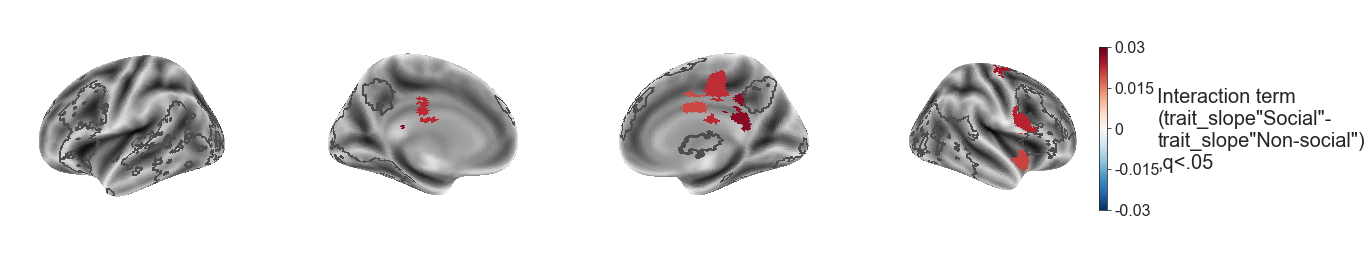

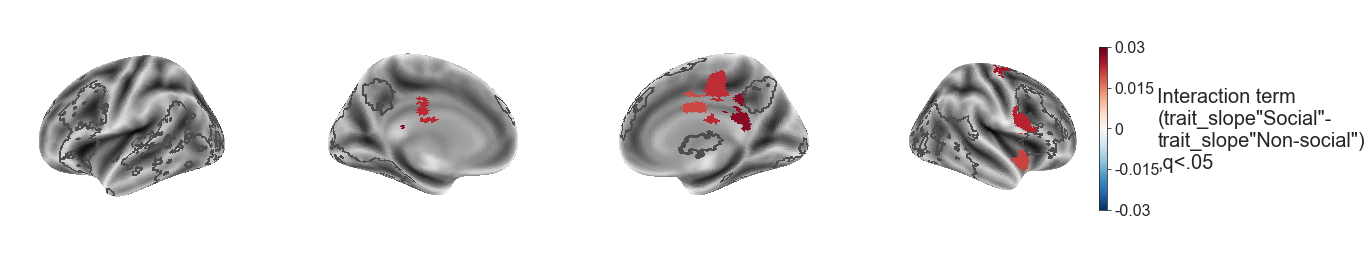

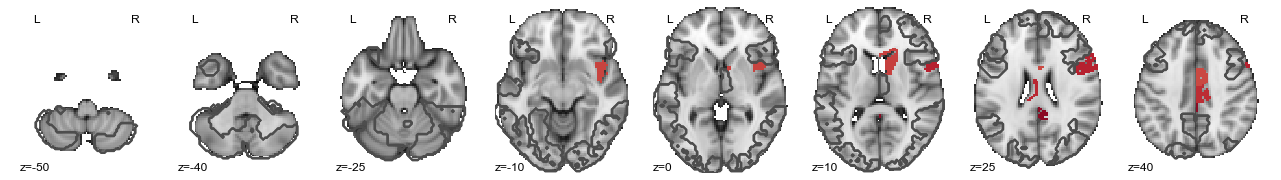

In [494]:
coords = [-50,-40,-25,-10,0,10,25,40] # initial exploration
#coords = [-40,-30,-20] # for the final version
cmap = 'RdBu_r'

resp_lbl = ["Nonsocial",  "Social"]
    
vmin,vmax = -.03,.03

#txt = r"$\overline{\beta}(''Social''-''Non-social'')$"
txt = 'Interaction term\n(trait_slope"Social"-\ntrait_slope"Non-social")\n,q<.05'

nodes = np.zeros((268,))
node_inds = [int(i) for i in rand_sig_interaction_nodes[:,0]]
nodes[node_inds] = rand_sig_interaction_nodes[:,1]
title_txt = f'RANDOM MECH "Social"-"Non-social"'

fig,ax = plt.subplots(nrows=1,ncols=4,figsize = (20,5),subplot_kw={'projection': '3d'})


img = roi_to_brain(pd.Series(nodes), mask_x)
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
ax_plot.add_contours(color_rois((nodes_coaxbill_rand_all)),linewidths=1, colors=[[.3,.3,.3,1]],linestyles='solid')
#ax_plot.add_contours(color_rois((pCorrs_rand<.05)),linewidths=2, colors=['g'],linestyles='solid')
#ax_plot.title(title_txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot._colorbar_ax.text(1,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
#plt.savefig(os.path.join(fig_save_loc,f'RAND/{resp_lbl[resp]}/axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
#plt.clf()

#LH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_left,axes=ax[0])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})

#surf_plot1.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
texture_contour1 = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_left, texture_contour1, axes = ax[0], figure=surf_plot1, legend=True,levels = [1], colors=[[.3,.3,.3,1]])
#plt.savefig(os.path.join(fig_save_loc,f'RAND/{resp_lbl[resp]}/left_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')   
#plt.clf()
   

surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_left, view = 'medial',axes=ax[1])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
plot_surf_contours(fsaverage.infl_left, texture_contour1, axes = ax[1], figure=surf_plot2, legend=True,levels = [1], colors=[[.3,.3,.3,1]])
#plt.savefig(os.path.join(fig_save_loc,f'RAND/{resp_lbl[resp]}/left_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
#plt.clf()

#RH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
surf_plot3=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right,axes=ax[3])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
surf_plot3.axes[4].text(.4,.5*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
texture_contour1 = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_right, texture_contour1, axes = ax[3],figure=surf_plot3, legend=True,levels = [1], colors=[[.3,.3,.3,1]])
#plt.savefig(os.path.join(fig_save_loc,f'RAND/{resp_lbl[resp]}/right_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
#plt.clf()


surf_plot4=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=False,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right, view ='medial',axes=ax[2])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
plot_surf_contours(fsaverage.infl_right, texture_contour1, axes = ax[2], figure=surf_plot4, legend=True,levels = [1], colors=[[.3,.3,.3,1]])
#plt.savefig(os.path.join(fig_save_loc,f'RAND/{resp_lbl[resp]}/right_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
#plt.clf()


(<Figure size 403.2x288 with 5 Axes>,
 array([[<Axes3DSubplot:>, <Axes3DSubplot:>],
        [<Axes3DSubplot:>, <Axes3DSubplot:>]], dtype=object))

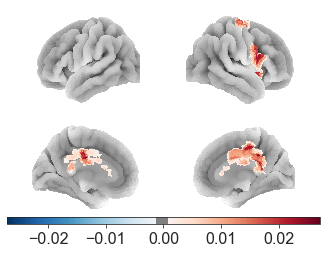

In [313]:
from nilearn.plotting import plot_img_on_surf
plot_img_on_surf(img.to_nifti(),threshold=.001,
                          views=['lateral', 'medial'],
                          hemispheres=['left', 'right'],
                          colorbar=True,cmap= cmap)

In [461]:
order = np.argsort(-rand_sig_interaction_nodes[:,1]) # in descending order of the interaction coefft
node_inds = [int(i) for i in rand_sig_interaction_nodes[order,0]]


In [191]:
x = "coef_slope"
#y = "Loneliness_Unadj"
y = "ASR_Intn_T"

tr0_ind=3

for i,n in enumerate(node_inds):
    fig,ax = plt.subplots(figsize=(10,5),nrows=1,ncols=2)
    hem = 'Left' if n >=134 else 'Right'
    ind = order[i]
    sl = np.round(1000*rand_sig_interaction_nodes[ind,1])/1000
    plt.suptitle('Node ' + str(n+1) + '(' + hem + ') ' +  "\n".join(eval(shen268_lbl[str(n+1)][0])["name"].split(';')))
       
    for resp in range(2):        
        respType = '"Social"' if resp == 1 else '"Non-social"'
        rows = [int(i) for i in np.where(responses[:,4]==resp)[0]]
        fMRI_data = pd.DataFrame({'Subject':np.array(sub_id_all)[rows],'coef_slope':coef_slope_rand[rows,n], 'responses':rows})
        fMRI_data.set_index("Subject", inplace=True)
        data = fMRI_data.join(behav_data, how='inner') # join betas and trait info
        
        #explore_correlation(x,y,d,ax[i,resp],f'Node{n+1},{respType}','Spearman')
        sns.regplot(data[x],data[y],ax=ax[resp],color = 'grey')
        inds = (~np.isnan(data[x])) & (~np.isnan(data[y]))
        r,p = stats.spearmanr(data.loc[inds,x],data.loc[inds,y])
        ax[resp].set_title(respType)
        if p>.05:
            ax[resp].text(-4,70,f'r={r:.2f}\n(p={p:.2f})')
        else:
            ax[resp].text(-4,70,f'r={r:.2f}\n(p={p:.1e})')
        ax[resp].set_xlim(-4,4)
        ax[resp].set_ylim(30,80)
        ax[resp].set_xticks([-3,-2,-1,0,1,2,3])
        ax[resp].set_yticks([30,40,50,60,70,80])

    plt.tight_layout()

NameError: name 'node_inds' is not defined

# Separate social/nonsocial plots

In [200]:
coords = [-50,-40,-25,-10,0,10,25,40] # initial exploration
#coords = [-40,-30,-20] # for the final version
cmap = 'RdBu_r'

resp_lbl = ["Nonsocial",  "Social"]
    
vmin,vmax = -.32,.32
for resp in [0,1]:
    if resp == 1:
        txt = f'  {corrtype} r\n  (p<.05 unc.)\n {y} vs  'r"$\overline{\beta}(''Social'')$"
    else:
        txt = f'  {corrtype} r\n  (p<.05 unc.)\n {y} vs  'r"$\overline{\beta}(''Non-social'')$"

    nodes = np.zeros((268,))
    nodes[pval_nodes_rand[:,resp]<.05] = corr_nodes_rand[pval_nodes_rand[:,resp]<.05,resp]

    title_txt = f'RANDOM MECH "{resp_lbl[resp]}"'

    img = roi_to_brain(pd.Series(nodes), mask_x)
    ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
    ax_plot.add_contours(color_rois((nodes_coaxbill_rand_all)),linewidths=1, colors=[[.3,.3,.3,1]],linestyles='solid')
    ax_plot.add_contours(color_rois((pCorrs_rand<.05)),linewidths=2, colors=['g'],linestyles='solid')
    #ax_plot.title(title_txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
    #ax_plot._colorbar_ax.text(1,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
    #plt.savefig(os.path.join(fig_save_loc,f'RAND/{resp_lbl[resp]}/axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
    #plt.clf()

    fig,ax = plt.subplots(nrows=1,ncols=4,figsize = (20,5),subplot_kw={'projection': '3d'})

    #LH
    texture = vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_left,axes=ax[0])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    #surf_plot1.axes[1].text(3,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
    surf_plot1.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
    texture_contour1 = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
    plot_surf_contours(fsaverage.infl_left, texture_contour1, figure=surf_plot1,axes=ax[0], legend=True,levels = [1], colors=[[.3,.3,.3,1]])
    #plt.savefig(os.path.join(fig_save_loc,f'RAND/{resp_lbl[resp]}/left_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')   
    #plt.clf()

    surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_left, view = 'medial',axes=ax[1])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    #surf_plot2.axes[1].text(3,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
    #surf_plot2.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
    plot_surf_contours(fsaverage.infl_left, texture_contour1, figure=surf_plot2, legend=True,levels = [1], colors=[[.3,.3,.3,1]],axes=ax[1])
    #plt.savefig(os.path.join(fig_save_loc,f'RAND/{resp_lbl[resp]}/left_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
    #plt.clf()

    #RH
    texture = vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    surf_plot3=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_right,axes=ax[3])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    surf_plot3.axes[1].text(3,.8*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
    texture_contour1 = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
    plot_surf_contours(fsaverage.infl_right, texture_contour1, figure=surf_plot3, axes=ax[3], legend=True,levels = [1], colors=[[.3,.3,.3,1]])
    #plt.savefig(os.path.join(fig_save_loc,f'RAND/{resp_lbl[resp]}/right_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
    #plt.clf()

    surf_plot4=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=False,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                                bg_map=fsaverage.sulc_right, view ='medial',axes=ax[2])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
    plot_surf_contours(fsaverage.infl_right, texture_contour1, figure=surf_plot4, axes=ax[2], legend=True,levels = [1], colors=[[.3,.3,.3,1]])
    #plt.savefig(os.path.join(fig_save_loc,f'RAND/{resp_lbl[resp]}/right_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
    #plt.clf()


NameError: name 'corr_nodes_rand' is not defined

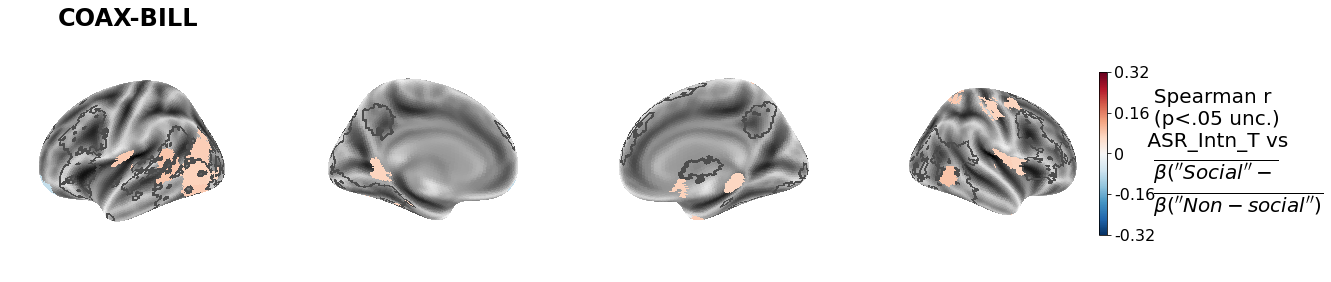

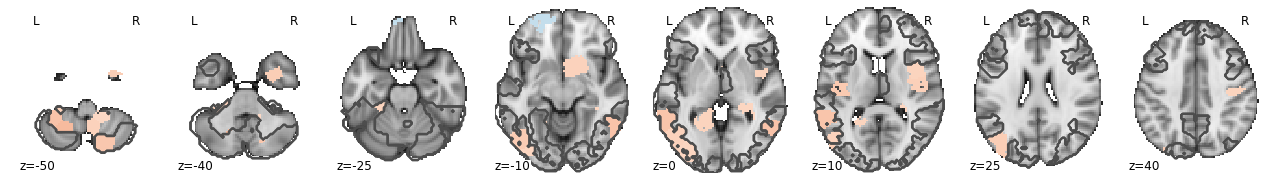

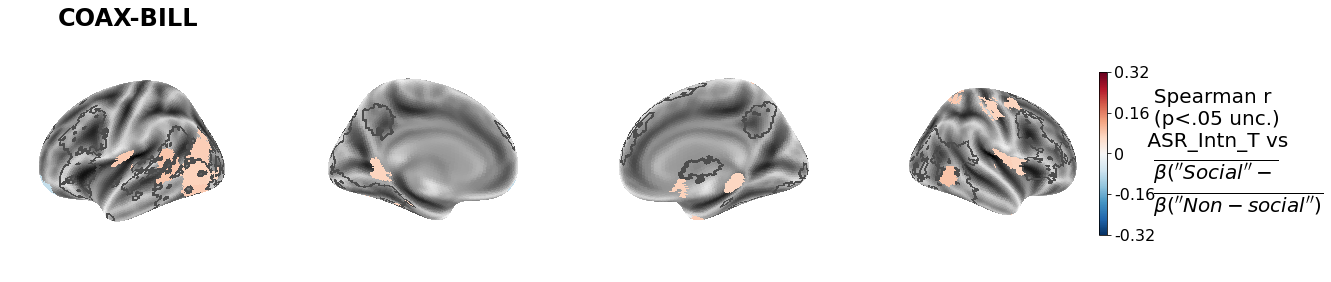

In [206]:
# COAX-BILL
coords = [-50,-40,-25,-10,0,10,25,40] # initial exploration
#coords = [-40,-30,-20] # for the final version

txt = f'  {corrtype} r\n  (p<.05 unc.)\n {y} vs  \n  'r"$\overline{\beta(''Social''-}$" + '\n  ' + r"$\overline{\beta(''Non-social'')}$"
title_txt = 'COAX-BILL'

nodes = np.zeros((268,))
nodes[pval_nodes_coaxbill<.05] = corr_nodes_coaxbill[pval_nodes_coaxbill<.05]
#vmin,vmax = -max(abs(nodes)),max(abs(nodes))
vmin,vmax = -.32,.32

cmap = 'RdBu_r'

img = roi_to_brain(pd.Series(nodes), mask_x)
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= False,threshold = .0001)
ax_plot.add_contours(color_rois((nodes_coaxbill_rand_all)),linewidths=1, colors=[[.3,.3,.3,1]],linestyles='solid')

fig,ax = plt.subplots(nrows=1,ncols=4,figsize = (20,5),subplot_kw={'projection': '3d'})

#LH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
surf_plot1=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_left,axes=ax[0])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot1.axes[1].text(1,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
surf_plot1.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_left, texture_contour, figure=surf_plot1,axes=ax[0], legend=True,levels = [1], colors=[[.3,.3,.3,1]])
#plt.savefig(os.path.join(fig_save_loc,f'COAXBILL/left_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
#plt.clf()

surf_plot2=plot_surf_roi(fsaverage.infl_left, texture, hemi='left',cmap = cmap, colorbar=False, symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_left, view = 'medial',axes=ax[1])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot2.axes[1].text(3,.8*vmax,s= txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#surf_plot2.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
plot_surf_contours(fsaverage.infl_left, texture_contour, figure=surf_plot2,axes=ax[1], legend=True,levels = [1], colors=[[.3,.3,.3,1]])
#plt.savefig(os.path.join(fig_save_loc,f'COAXBILL/left_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
#plt.clf()

#RH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
surf_plot3=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right,axes=ax[3])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
surf_plot3.axes[4].text(3,.8*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#surf_plot3.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
texture_contour = vol_to_surf(color_rois(nodes_coaxbill_rand_all), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
plot_surf_contours(fsaverage.infl_right, texture_contour, figure=surf_plot3,axes=ax[3], legend=True,levels = [1], colors=[[.3,.3,.3,1]])
#plt.savefig(os.path.join(fig_save_loc,f'COAXBILL/right_lat.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
#plt.clf()

surf_plot4=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=False,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right, view ='medial',axes=ax[2])#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
#surf_plot4.axes[1].text(3,.8*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
#surf_plot4.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')
plot_surf_contours(fsaverage.infl_right, texture_contour, figure=surf_plot4,axes=ax[2], legend=True,levels = [1], colors=[[.3,.3,.3,1]])
#plt.savefig(os.path.join(fig_save_loc,f'COAXBILL/right_med.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
#plt.clf()


# Plot correlations

In [492]:
#"Social" alone
nodes_ind = np.where( (pval_nodes_rand[:,1]<.05))[0]
for n in nodes_ind:
    lbl = eval(shen268_lbl[str(n+1)][0])['name']
    print(n+1,lbl)

20 43.55% Frontal_Operculum_Cortex; 33.40% Insular_Cortex; 10.36% Inferior_Frontal_Gyrus_pars_triangularis; 6.98% Frontal_Orbital_Cortex; 5.71% Inferior_Frontal_Gyrus_pars_opercularis
21 63.51% Precentral_Gyrus; 33.67% Inferior_Frontal_Gyrus_pars_opercularis
26 75.10% Precentral_Gyrus; 24.62% Superior_Frontal_Gyrus
31 75.69% Precentral_Gyrus; 20.60% Middle_Frontal_Gyrus
34 72.35% Insular_Cortex; 17.49% Planum_Polare
35 46.52% Central_Opercular_Cortex; 42.61% Insular_Cortex; 6.96% Frontal_Operculum_Cortex
45 56.46% Supramarginal_Gyrus_anterior_division; 29.54% Postcentral_Gyrus; 10.47% Supramarginal_Gyrus_posterior_division
46 30.14% Parietal_Operculum_Cortex; 28.13% Planum_Temporale; 14.65% Supramarginal_Gyrus_posterior_division; 13.38% Supramarginal_Gyrus_anterior_division; 7.69% Superior_Temporal_Gyrus_posterior_division
59 54.08% Inferior_Temporal_Gyrus_posterior_division; 45.92% Temporal_Fusiform_Cortex_posterior_division
84 99.45% Cingulate_Gyrus_anterior_division
85 98.98% Cingul

In [504]:
#"Social" alone
nodes_ind = np.where( (pval_nodes_coaxbill<.05))[0]
for n in nodes_ind:
    lbl = eval(shen268_lbl[str(n+1)][0])['name']
    print(n+1,np.round(corr_nodes_coaxbill[n],2),np.round(np.nanmean(coef_slope_coax[:,n]-coef_slope_bill[:,n]),2),lbl)

32 0.07 -0.29 59.27% Precentral_Gyrus; 25.61% Middle_Frontal_Gyrus; 15.12% Superior_Frontal_Gyrus
33 0.07 -0.37 79.75% Postcentral_Gyrus; 20.25% Precentral_Gyrus
35 0.07 -0.17 46.52% Central_Opercular_Cortex; 42.61% Insular_Cortex; 6.96% Frontal_Operculum_Cortex
40 0.08 -0.22 62.08% Central_Opercular_Cortex; 30.21% Insular_Cortex; 6.46% Heschl's_Gyrus_(includes_H1_and_H2)
41 0.08 -0.28 62.20% Superior_Parietal_Lobule; 27.99% Lateral_Occipital_Cortex_superior_division; 8.37% Postcentral_Gyrus
60 0.08 0.1 59.02% Temporal_Fusiform_Cortex_anterior_division; 27.58% Temporal_Pole; 11.34% Inferior_Temporal_Gyrus_anterior_division
69 0.09 0.17 48.69% Middle_Temporal_Gyrus_temporooccipital_part; 29.07% Lateral_Occipital_Cortex_inferior_division; 22.09% Inferior_Temporal_Gyrus_temporooccipital_part
93 0.07 -0.1 50.90% Right_Hippocampus; 31.44% Right_Lateral_Ventricle; 7.49% Right_Thalamus; 7.49% Lingual_Gyrus
108 0.07 0.1 73.28% no_label; 26.72% Brain-Stem
112 0.09 0.31 100.00% no_label
115 0.07

In [506]:
y

'ASR_Intn_T'

Text(-3.8670770195274997, 120, '"Social",Left hem\n100.00% Frontal_Pole')

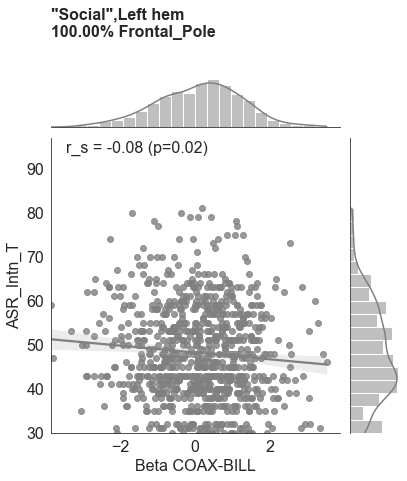

In [512]:
x = "slopeReg_diff"

#for n in range(268):
n=138
#n=191 # left MTG
hemi_txt = 'Right hem' if n < 134 else 'Left hem'
lbl  = '\n'.join(eval(shen268_lbl[str(n+1)][0])['name'].split(';'))
fMRI_data = pd.DataFrame({'Subject':sub_id_all,'slopeReg_diff':coef_slope_coax[:,n]-coef_slope_bill[:,n], 'responses':(responses[:,0]==1)&(responses[:,1]==0)})
fMRI_data.set_index("Subject", inplace=True)
data = fMRI_data.join(behav_data, how='inner') # join betas and trait info


d = data.loc[data['responses']==True,:]
g = explore_correlation(x,y,d)
plt.xlabel('Beta COAX-BILL')
plt.text(plt.xlim()[0],100,f'"{resp_lbl[resp]}" (n={d.shape[0]}),\n Node{n+1}',fontweight = 'bold')
plt.xlim(min(data[x]),max(data[x]))
plt.ylim(min(data[y]),max(data[y]))
plt.text(plt.xlim()[0],120,f'"{resp_lbl[resp]}",{hemi_txt}\n{lbl}',fontweight='bold')
#g.savefig(f'../results/RandBeta{n+1}_vs_loneliness.png')



In [155]:
np.where(pval_nodes_fish[:,0]<.05)[0]

array([ 42,  84,  85,  89,  94,  97, 114, 121, 123, 156, 158, 162, 167,
       181, 185, 190, 205, 219, 221, 222, 223, 224, 226, 227, 232, 234,
       235, 236, 254, 257, 259])

In [156]:
np.where(pval_nodes_fish[:,1]<.05)[0]

array([ 42,  84, 121, 143, 151, 153, 222, 235, 244, 266])

In [151]:
np.where(pval_nodes_rand[:,1]<.05)

(array([ 19,  20,  25,  30,  33,  34,  44,  45,  58,  83,  84,  88, 104,
        113, 120, 123, 168, 223]),)

In [160]:
nodes_ind =np.where((pval_nodes_rand[:,1]<.05) & (pval_nodes_fish[:,0]<.05))[0]
for n in nodes_ind:
    lbl = eval(shen268_lbl[str(n+1)][0])['name']
    print(n+1,lbl)

85 98.98% Cingulate_Gyrus_posterior_division
124 92.94% Right_Putamen; 5.44% Insular_Cortex
224 42.96% Cingulate_Gyrus_posterior_division; 37.11% Left_Lateral_Ventrical; 9.62% no_label; 9.28% Cingulate_Gyrus_anterior_division


In [157]:
np.where((pval_nodes_rand[:,1]<.05) & (pval_nodes_fish[:,1]<.05))

(array([84]),)

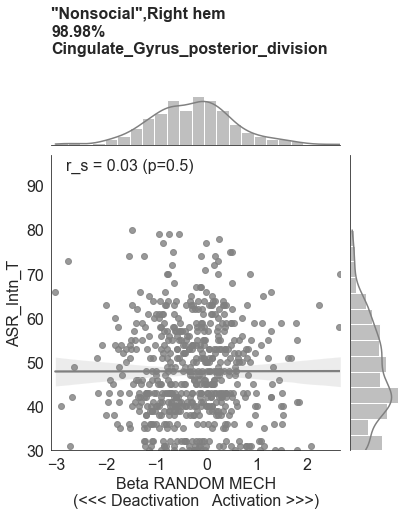

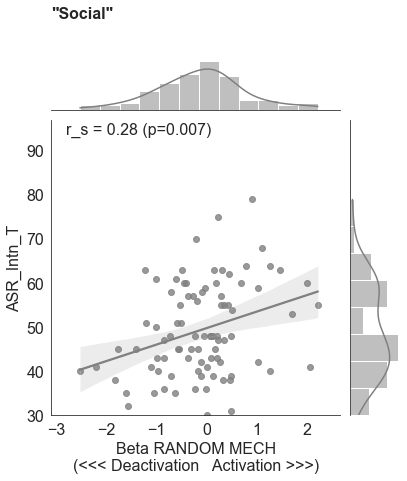

In [161]:
x = "slopeReg_node"

#for n in range(268):
n=84 
hemi_txt = 'Right hem' if n < 134 else 'Left hem'
lbl  = '\n'.join(eval(shen268_lbl[str(n+1)][0])['name'].split())
fMRI_data = pd.DataFrame({'Subject':sub_id_all,'slopeReg_node':coef_slope_rand[:,n], 'responses':responses[:,4]})
fMRI_data.set_index("Subject", inplace=True)
data = fMRI_data.join(behav_data, how='inner') # join betas and trait info

for resp in [0,1]:
    d = data.loc[data['responses']==resp,:]
    g = explore_correlation(x,y,d,'Spearman')
    plt.xlabel('Beta RANDOM MECH\n(<<< Deactivation   Activation >>>)')
    plt.text(plt.xlim()[0],100,f'"{resp_lbl[resp]}" (n={d.shape[0]}),\n Node{n+1}',fontweight = 'bold')
    plt.xlim(min(data[x]),max(data[x]))
    plt.ylim(min(data[y]),max(data[y]))
    if resp ==0:
        plt.text(plt.xlim()[0],120,f'"{resp_lbl[resp]}",{hemi_txt}\n{lbl}',fontweight='bold')
    else:
        plt.text(plt.xlim()[0],120,f'"{resp_lbl[resp]}"',fontweight='bold')
    #g.savefig(f'../results/RandBeta{n+1}_vs_loneliness.png')



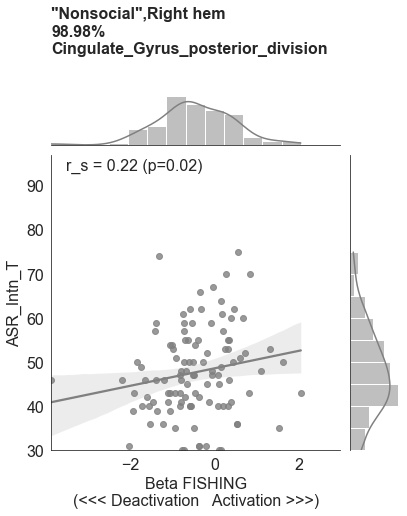

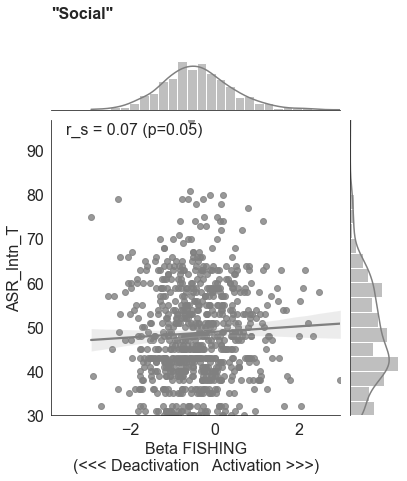

In [162]:
x = "slopeReg_node"
#for n in range(268):
n=84
hemi_txt = 'Right hem' if n < 134 else 'Left hem'
lbl  = '\n'.join(eval(shen268_lbl[str(n+1)][0])['name'].split())
fMRI_data = pd.DataFrame({'Subject':sub_id_all,'slopeReg_node':coef_slope_fish[:,n], 'responses':responses[:,3]})
fMRI_data.set_index("Subject", inplace=True)
data = fMRI_data.join(behav_data, how='inner') # join betas and trait info

for resp in [0,1]:
    d = data.loc[data['responses']==resp,:]
    g = explore_correlation(x,y,d,'Spearman')
    plt.xlabel('Beta FISHING\n(<<< Deactivation   Activation >>>)')
    plt.text(plt.xlim()[0],100,f'"{resp_lbl[resp]}" (n={d.shape[0]}),\n Node{n+1}',fontweight = 'bold')
    plt.xlim(min(data[x]),max(data[x]))
    plt.ylim(min(data[y]),max(data[y]))
    if resp ==0:
        plt.text(plt.xlim()[0],120,f'"{resp_lbl[resp]}",{hemi_txt}\n{lbl}',fontweight='bold')
    else:
        plt.text(plt.xlim()[0],120,f'"{resp_lbl[resp]}"',fontweight='bold')
    #g.savefig(f'../results/RandBeta{n+1}_vs_loneliness.png')



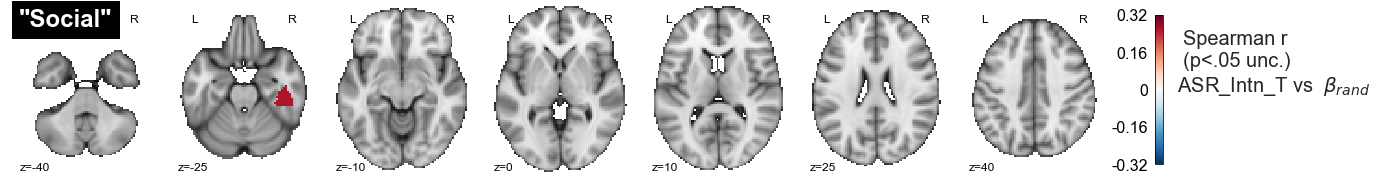

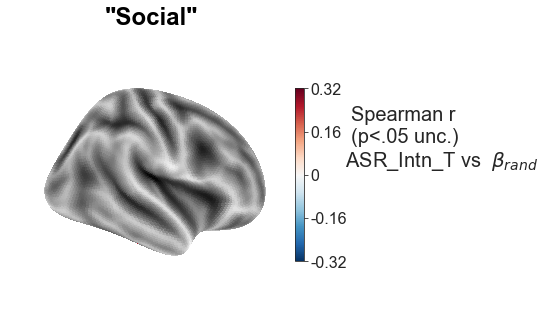

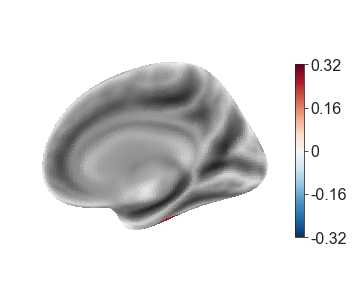

In [395]:
nodes = np.zeros((268,))
nodes[n] = corr_nodes[n,1]
cmap = 'RdBu_r'
img = roi_to_brain(pd.Series(nodes), mask_x)
ax_plot = plot_img(img.to_nifti(), display_mode = 'z',vmin = vmin, vmax = vmax, cut_coords =coords,cmap = cmap, bg_img = bg_img,colorbar= True,threshold = .0001)
ax_plot.title(title_txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
ax_plot._colorbar_ax.text(1,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()

#RH
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
surf_plot3=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
surf_plot3.axes[1].text(3,.8*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
surf_plot3.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')

surf_plot4=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right,view='medial')#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})


  

Text(0.5, 0.92, '"Social"')

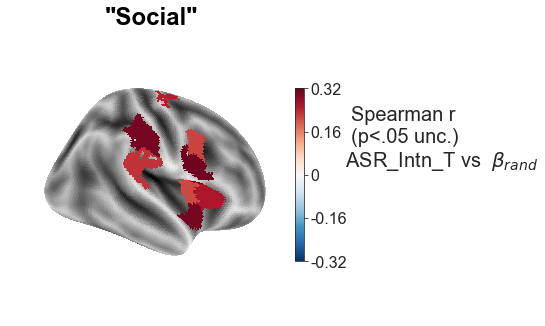

In [386]:
nodes = np.zeros((268,))
nodes[pval_nodes[:,1]<.05] = corr_nodes[pval_nodes[:,1]<.05,1]
    
texture = vol_to_surf(color_rois(nodes), fsaverage.pial_right,interpolation='nearest',radius =1, n_samples=1)
surf_plot3=plot_surf_roi(fsaverage.infl_right, texture, hemi='right',cmap = cmap, colorbar=True,symmetric_cmap=True, vmin = vmin, vmax = vmax,
                            bg_map=fsaverage.sulc_right)#,vol_to_surf_kwargs={"n_samples": 10, "radius": 10, "interpolation": "nearest","kind":'ball'})
surf_plot3.axes[1].text(3,.8*vmax,s=txt,fontsize=20, fontdict = {'verticalalignment':'top','horizontalalignment':'left','rotation':0})
surf_plot3.axes[0].set_title(title_txt,fontsize=24,color='k',fontweight='bold')

   

# plot timecourses

In [402]:
data_file_loc

'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/data'

In [403]:
tr0_ind = 3 # ind at which tr=0 starts
[timepts_indiv_movie,vid_start_rel_tr] = np.load(os.path.join(data_file_loc,'Video_TRs.npy'),allow_pickle=True)
print(vid_start_rel_tr)
l_task = 28

def remove_pretrial_TRs(tcs,vid_start_rel_tr,pretrial_TRs):

    tcs1 = np.empty((tcs.shape[0],tcs.shape[1],28+pretrial_TRs,tcs.shape[3]))
    tcs1[:] = np.nan

    for vid_no in range(10):
        tr0 = vid_start_rel_tr[vid_no]
        tcs1[:,:,:,vid_no] = tcs[:,:,tr0-pretrial_TRs:tr0+28,vid_no] # 31 timepts
    return tcs1

[7 14 14 14 14 7 14 14 14 14]


In [404]:
#select subs who responded "social" to the yes movie and nonsocial to the no movie

print('\ntrial-wise norm data.')
fileName = os.path.join(data_file_loc,'timecourses_run_norm','timecourse-all-movies_zscorenorm.npy') # load fmri data
tcs_run_z = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies
print('before:',tcs_run_z.shape)
tcs_run_z = remove_pretrial_TRs(tcs_run_z,vid_start_rel_tr,tr0_ind)
print('after:',tcs_run_z.shape)


trial-wise norm data.
before: (1048, 268, 56, 10)
after: (1048, 268, 31, 10)


In [406]:
nodes = np.where(pval_nodes[:,1]<.05)[0]
nodes

array([ 19,  20,  25,  30,  33,  34,  44,  45,  58,  83,  84,  88, 104,
       113, 120, 123, 168, 223])

In [412]:
# get the right red/blue shades
#red_rgb = [103,0,31] # edges of RdBu
#blue_rgb = [5,48,97] # edges of RdBu
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2 # transparency inside boxplots, for datapts etc.

In [420]:
fMRI_data = pd.DataFrame({'Subject':sub_id_all,'sub_ind':np.arange(0,1048),'slopeReg_node':coef_slope_rand[:,n], 'responses':responses[:,4]})
fMRI_data.set_index("Subject", inplace=True)
data = fMRI_data.join(behav_data, how='inner') # join betas and trait info


In [423]:
fMRI_data


,sub_ind,slopeReg_node,responses
Subject,,,
126628,0,0.747071,NaN
553344,1,0.197272,0.0
129129,2,-0.417354,0.0
385450,3,-0.673338,0.0
169949,4,0.336999,0.0
...,...,...,...
592455,1043,-0.029053,9.0
180937,1044,-0.034691,0.0
182739,1045,-0.409610,1.0


In [429]:
sorted_data = data.loc[data['responses']==1,['slopeReg_node','ASR_Intn_T','sub_ind','responses']]
sorted_data = sorted_data.sort_values(by=['ASR_Intn_T'])
sorted_data

,slopeReg_node,ASR_Intn_T,sub_ind,responses
Subject,,,,
744553,0.781376,30.0,259,1.0
102715,0.460724,31.0,575,1.0
144226,-0.032540,32.0,620,1.0
165032,0.000589,35.0,672,1.0
917255,0.454444,35.0,584,1.0
...,...,...,...,...
177140,0.920480,64.0,294,1.0
958976,0.225091,68.0,394,1.0
274542,0.678069,70.0,969,1.0


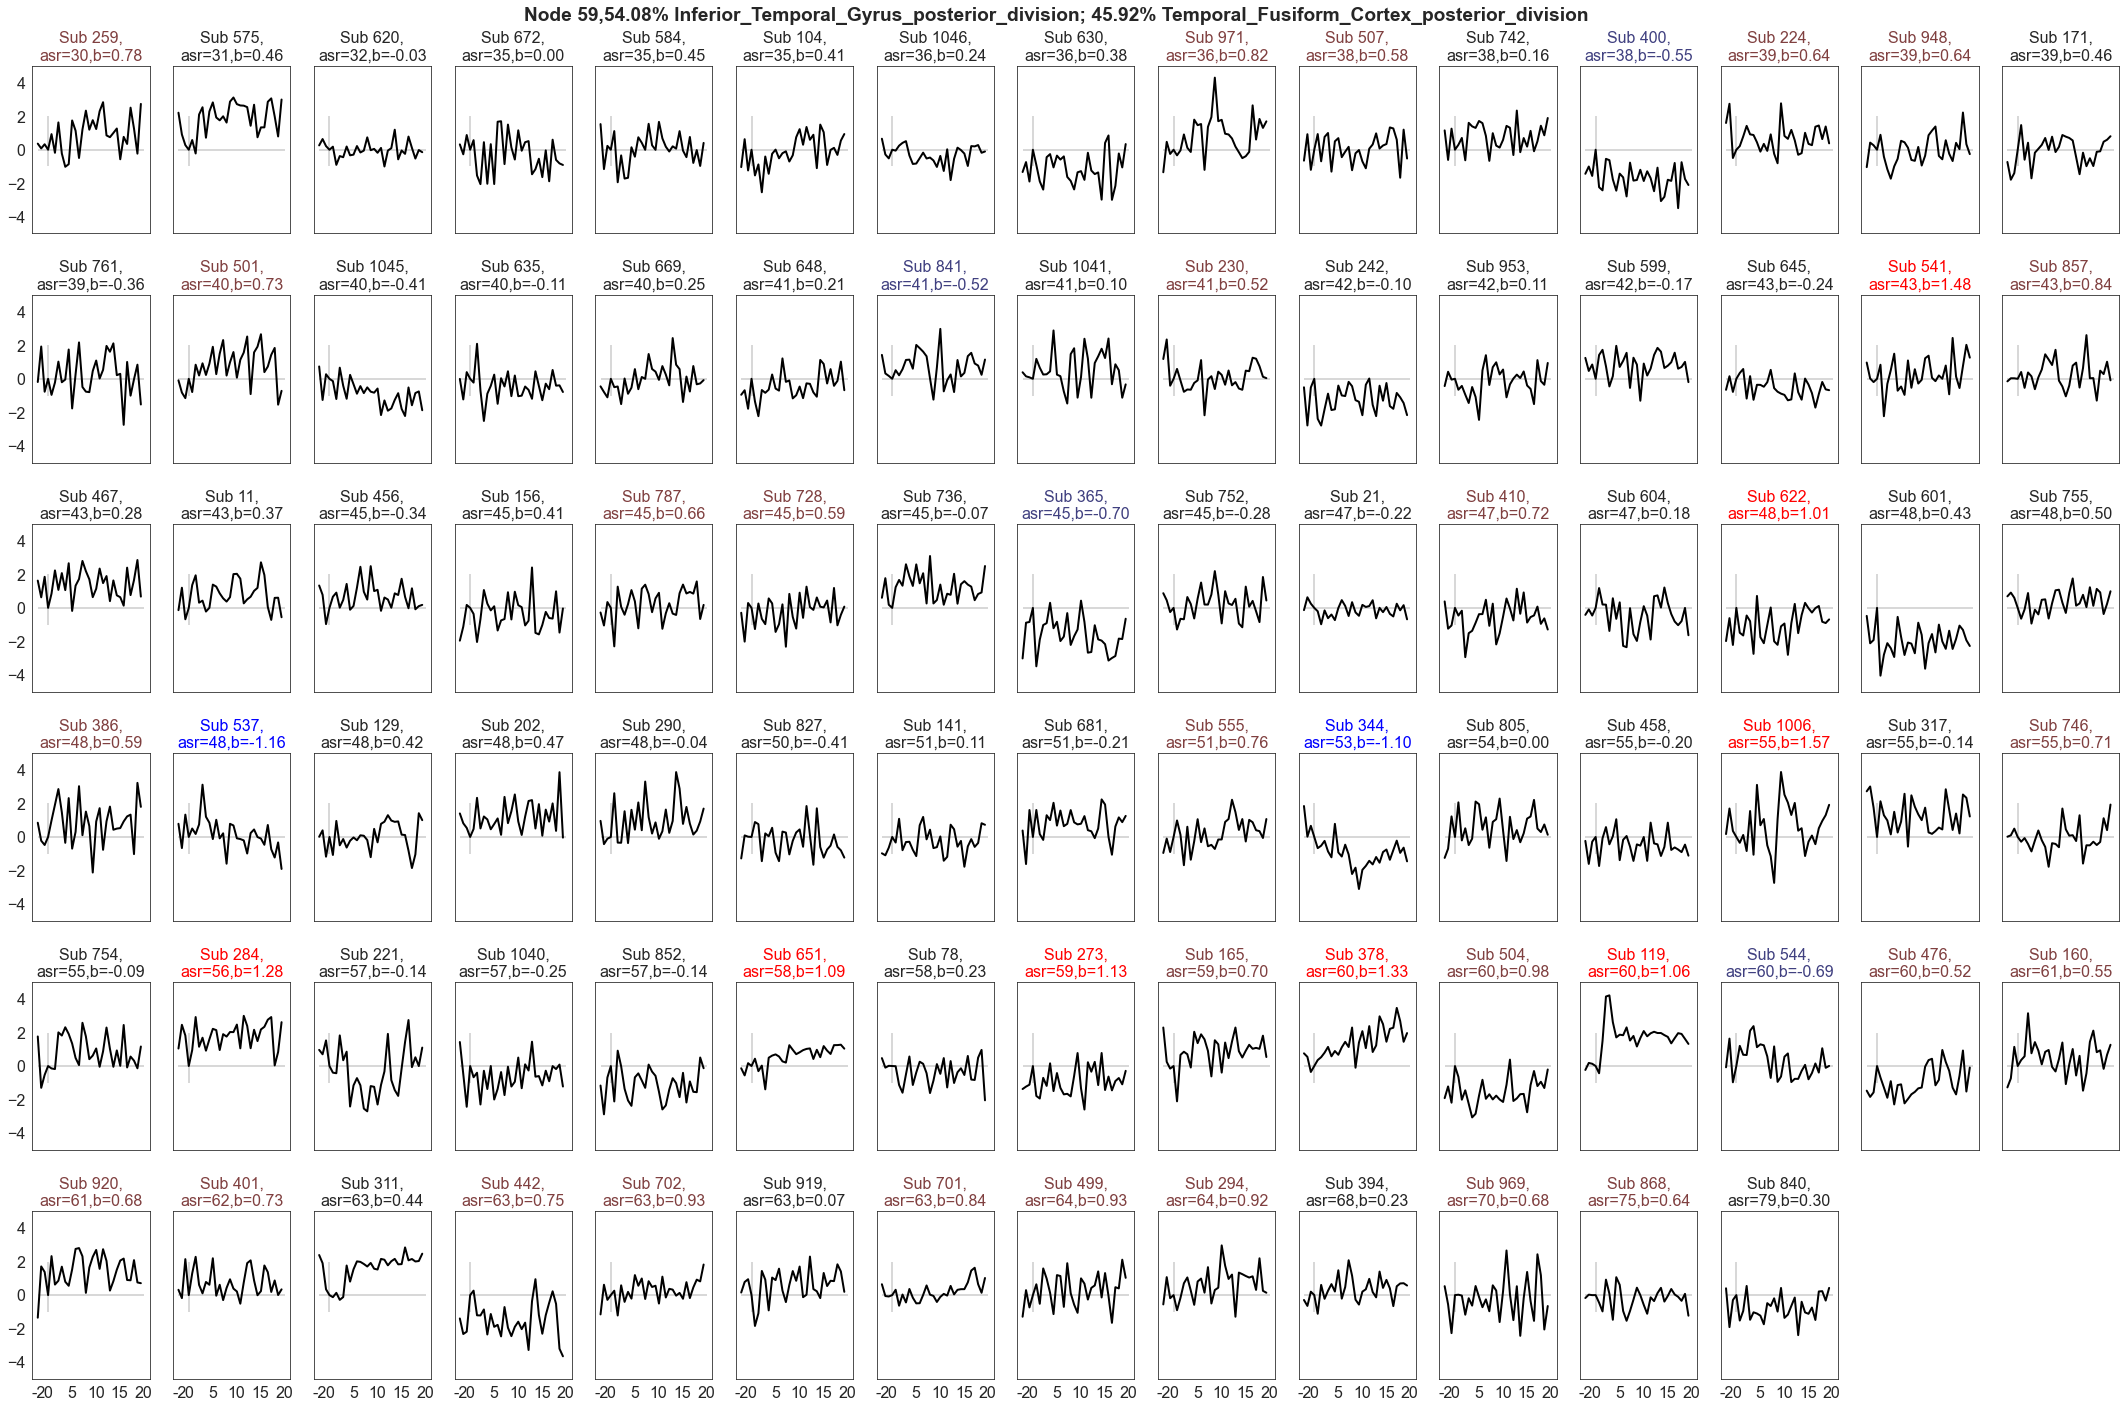

In [449]:
movie_ind = 4
ymin,ymax = -5,5
n = 58
subs = sorted_data['sub_ind'].values

ncols = 15
nrows= int(np.ceil(len(subs)/ncols))
#fig, axes = plt.subplots(67,4, figsize=(15,150))
xwidth = 30
yheight = 20# .75*nrows*xwidth/ncols
fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize = (xwidth,yheight))
fig.set_figwidth(xwidth)
fig.set_figheight(yheight)

TR=.72
xlbls = [-2,0,5,10,15,20]
x_ticks = [(i/TR)+tr0_ind for i in xlbls]
xlbls = [str(i) for i in xlbls]
lbls = [str(np.round((i-tr0_ind)*TR,1)) for i in x_ticks]

plt.suptitle(f'Node {n+1},{eval(shen268_lbl[str(n+1)][0])["name"]}',fontweight='bold')

for i,s in enumerate(subs):

    r = int(np.floor(i/ncols))
    c = int(np.floor(i%ncols))

    movieTC_yes = tcs_run_z[s,n,:,movie_ind] # nsubs * ntimepts
    #movieTC_no  = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts
    #sig = np.where(~np.isnan(meanDiff_rand[n,:]))[0]    

    ax[r,c].set_ylim(ymin,ymax)
    ax[r,c].plot(range(movieTC_yes.shape[0]),movieTC_yes,color = 'k',linewidth=2,label ='"Social"')
    #ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
    #if r==0:
    if sorted_data["slopeReg_node"][i] > 1:
        ax[r,c].set_title(f'Sub {s},\nasr={int(sorted_data["ASR_Intn_T"][i])},b={sorted_data["slopeReg_node"][i]:.2f}', color='r',fontsize = 16)
    elif sorted_data["slopeReg_node"][i] > .5:
        ax[r,c].set_title(f'Sub {s},\nasr={int(sorted_data["ASR_Intn_T"][i])},b={sorted_data["slopeReg_node"][i]:.2f}', color=[.5,.25,.25],fontsize = 16,)
    elif sorted_data["slopeReg_node"][i] < -1:
        ax[r,c].set_title(f'Sub {s},\nasr={int(sorted_data["ASR_Intn_T"][i])},b={sorted_data["slopeReg_node"][i]:.2f}', color='b',fontsize = 16)
    elif sorted_data["slopeReg_node"][i] < -.5:
        ax[r,c].set_title(f'Sub {s},\nasr={int(sorted_data["ASR_Intn_T"][i])},b={sorted_data["slopeReg_node"][i]:.2f}', color=[.25,.25,.5],fontsize = 16)
    else:
        ax[r,c].set_title(f'Sub {s},\nasr={int(sorted_data["ASR_Intn_T"][i])},b={sorted_data["slopeReg_node"][i]:.2f}',fontsize = 16)
    
    ax[r,c].vlines(tr0_ind,-1,2,color=[.8,.8,.8])
    ax[r,c].hlines(0,0,31,color=[.8,.8,.8])
    ax[r,c].set_xticks(x_ticks)
    ax[r,c].set_xticklabels(xlbls)

ax[r,c+1].axis('off')
ax[r,c+2].axis('off')

plt.tight_layout()

In [434]:
sorted_data['ASR_Intn_T'][i]

79.0

Text(0.5, 27.99999999999995, 'Beta Rand')

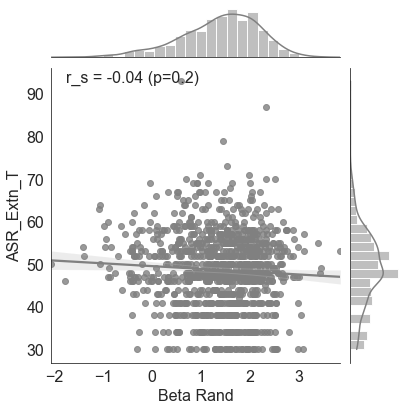

In [90]:
y = "ASR_Extn_T"
g = explore_correlation(x, y)
plt.xlabel('Beta Rand')


Determine whether the difference in correlation between `Soc-NonSoc_pc` and internalizing vs externalizing symptoms is statistically significant:

In [13]:
x = "Soc-NonSoc_pc"
y = "ASR_Intn_T"
z = "ASR_Extn_T"

inds = ~np.isnan(data[x]) & ~np.isnan(data[y]) & ~np.isnan(data[z])
print(inds.sum())

rs_xy = stats.spearmanr(data[x][inds], data[y][inds])[0]
rs_xz = stats.spearmanr(data[x][inds], data[z][inds])[0]
rs_yz = stats.spearmanr(data[y][inds], data[z][inds])[0]
print(rs_xy)
print(rs_xz)
print(rs_yz)

816
0.09774091538820617
0.05045943183596981
0.5143954463909547


The following function was taken from here: https://github.com/psinger/CorrelationStats/blob/master/corrstats.py

In [14]:
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh

def rz_ci(r, n, conf_level = 0.95):
    zr_se = pow(1/(n - 3), .5)
    moe = norm.ppf(1 - (1 - conf_level)/float(2)) * zr_se
    zu = atanh(r) + moe
    zl = atanh(r) - moe
    return tanh((zl, zu))

def rho_rxy_rxz(rxy, rxz, ryz):
    num = (ryz-1/2.*rxy*rxz)*(1-pow(rxy,2)-pow(rxz,2)-pow(ryz,2))+pow(ryz,3)
    den = (1 - pow(rxy,2)) * (1 - pow(rxz,2))
    return num/float(den)

def dependent_corr(xy, xz, yz, n, twotailed=True, conf_level=0.95, method='steiger'):
    """
    Calculates the statistic significance between two dependent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between x and z
    @param yz: correlation coefficient between y and z
    @param n: number of elements in x, y and z
    @param twotailed: whether to calculate a one or two tailed test, only works for 'steiger' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'steiger' or 'zou'
    @return: t and p-val
    """
    if method == 'steiger':
        d = xy - xz
        determin = 1 - xy * xy - xz * xz - yz * yz + 2 * xy * xz * yz
        av = (xy + xz)/2
        cube = (1 - yz) * (1 - yz) * (1 - yz)

        t2 = d * np.sqrt((n - 1) * (1 + yz)/(((2 * (n - 1)/(n - 3)) * determin + av * av * cube)))
        p = 1 - t.cdf(abs(t2), n - 3)

        if twotailed:
            p *= 2

        return t2, p
    elif method == 'zou':
        L1 = rz_ci(xy, n, conf_level=conf_level)[0]
        U1 = rz_ci(xy, n, conf_level=conf_level)[1]
        L2 = rz_ci(xz, n, conf_level=conf_level)[0]
        U2 = rz_ci(xz, n, conf_level=conf_level)[1]
        rho_r12_r13 = rho_rxy_rxz(xy, xz, yz)
        lower = xy - xz - pow((pow((xy - L1), 2) + pow((U2 - xz), 2) - 2 * rho_r12_r13 * (xy - L1) * (U2 - xz)), 0.5)
        upper = xy - xz + pow((pow((U1 - xy), 2) + pow((xz - L2), 2) - 2 * rho_r12_r13 * (U1 - xy) * (xz - L2)), 0.5)
        return lower, upper
    else:
        raise Exception('Wrong method!')

In [15]:
n = inds.sum()

xy = stats.spearmanr(data[x][inds], data[y][inds])[0]
xz = stats.spearmanr(data[x][inds], data[z][inds])[0]
yz = stats.spearmanr(data[y][inds], data[z][inds])[0]

dependent_corr(xy, xz, yz, n, twotailed=False)

(1.3742665364218918, 0.08486883214144725)

Look at responses on RANDMECH:

In [16]:
all_trial_data = pd.read_csv('../data/hcp_social_826subs.csv')
all_trial_data.set_index("subj_idx", inplace=True)
all_trial_data.index.rename("Subject", inplace=True)
all_trial_data.index = all_trial_data.index.map(str)
all_trial_data.head()

,index,stim,movie,rt,response,run,accuracy
Subject,,,,,,,
168745,0,Mental,Scaring.AVI,1.252,1,1,1.0
168745,1,Mental,SEDUCING-B.AVI,0.578,1,1,1.0
168745,2,Random,STAR-A.AVI,1.643,0,1,1.0
168745,3,Mental,SURPRISING-B.AVI,1.082,1,1,1.0
168745,4,Random,TENNIS-A.AVI,1.232,0,1,1.0


In [17]:
data = data.join(all_trial_data[all_trial_data["movie"]=="Random mechanical.AVI"]["response"])
data.rename(columns={"response": "rand_mech_response"}, inplace=True)
data.head()

,countNonSoc(No),countSoc(Yes),Yes-No,Yes+No,No_pc,Yes_pc,Soc-NonSoc_pc,pc_unc_Rand,pc_unc_Mental,pc_unc_total,...,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,rand_mech_response
Subject,,,,,,,,,,,,,,,,,,,,,
100206,1.0,9.0,8.0,10.0,10.000000,90.000000,80.000000,0.0,0.0,0.0,...,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84,0
100307,4.0,5.0,1.0,9.0,44.444444,55.555556,11.111111,0.0,20.0,20.0,...,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76,1
100408,4.0,5.0,1.0,9.0,44.444444,55.555556,11.111111,20.0,0.0,20.0,...,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68,9
100610,5.0,5.0,0.0,10.0,50.000000,50.000000,0.000000,0.0,0.0,0.0,...,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88,0
101309,2.0,5.0,3.0,7.0,28.571429,71.428571,42.857143,60.0,0.0,60.0,...,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80,9


In [79]:
#red_rgb = [103,0,31] # edges of RdBu
#blue_rgb = [5,48,97] # edges of RdBu
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2 # transparency inside boxplots, for datapts etc.

In [21]:
#colors = [red_rgb,blue_rgb]
# Set your custom color palette
#myPalette = sns.set_palette(sns.color_palette(colors))

In [44]:
list(col[:2])+[alpha]

[0.7534313725490196, 0.23872549019607847, 0.2]

/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/lines.py:1200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.any(self._markerfacecolor != fc):
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/lines.py:1171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or np.any(self._markeredgecolor != ec)):


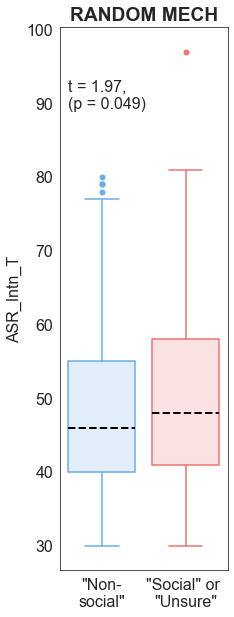

In [123]:
# Create a new variable denoting subjects who responded either "yes" or "unsure"
data["rand_mech_yesorunsure"] = data["rand_mech_response"] > 0

y = "ASR_Intn_T"

fig, ax = plt.subplots(figsize=(3,10))

#sns.set_palette(["tab:blue", "tab:red"])
ax = sns.boxplot(x="rand_mech_yesorunsure", y=y, data=data)
ax.set_xlabel("RANDMECH response")
ax.set_xticklabels(["\"Non-\nsocial\"", "\"Social\" or \n\"Unsure\""])

'''for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, alpha))
 patch.set_edgecolor((r, g, b, 1))'''
 
for i,artist in enumerate(ax.artists):
    if i == 0:
        col = blue_rgb + [alpha]
    else:
        col = red_rgb + [alpha]
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    #col = artist.get_facecolor()
    artist.set_edgecolor(col)
    #artist.set_edgecolor('None')
    artist.set_facecolor(list(col[:3])+[alpha])
    if np.round(col[0],2) ==  .75:
        print(i)
    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        if j in [4,10]:
            line.set_color('k')
            line.set_linestyle('--')
            line.set_linewidth(2)
        else:
            line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        if j in [5,11]:
            line.set_marker('o')
plt.xlabel('')
plt.title('RANDOM MECH', fontweight = 'bold')
t, p = stats.ttest_ind(data[data["rand_mech_yesorunsure"]==1][y], data[data["rand_mech_yesorunsure"]==0][y], nan_policy='omit')
ax.annotate(f't = {t:.2f},\n(p = {p:.2g})', xy=(0.05, 0.85), xycoords='axes fraction')

fig.savefig('../results/RANDMECHresp_vs_ASRIntnT.png')


In [140]:
def box_plot(data, edge_color, fill_color,pos,v):
    # customize boxplots
    alpha= .2
    data = data[~np.isnan(data)]
    bp = ax.boxplot(data, positions = [pos], patch_artist=True,widths=.6,vert=v,flierprops = dict(markeredgecolor=edge_color,
    markerfacecolor=fill_color, alpha=alpha))
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for element in ['medians']:
        plt.setp(bp[element], color='k',linewidth=2,ls='dashed')

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color,alpha=alpha)#'w'       
        
    return bp

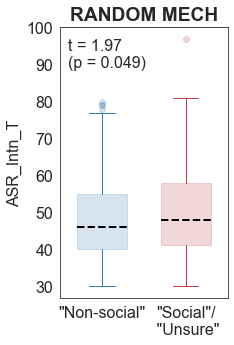

In [146]:
#data1 = data.loc[data['rand_mech_response']!=9,:]
#data1.shape
fig, ax = plt.subplots(figsize=(3,5))

y = "ASR_Intn_T"
#x = "rand_mech_response"
x = "rand_mech_yesorunsure"
rows = data[x] == 0
bp2 = box_plot(data.loc[rows,y], blue_rgb, blue_rgb,0,True)
rows = data[x] == 1
bp1 = box_plot(data.loc[rows,y], red_rgb, red_rgb,1,True)
plt.xticks(range(2),['"Non-social"','"Social"/\n "Unsure"'])
t, p = stats.ttest_ind(data[data[x]==1][y], data[data[x]==0][y], nan_policy='omit')
plt.ylabel('ASR_Intn_T')
ax.annotate(f't = {t:.2f}\n(p = {p:.2g})', xy=(0.05, 0.85), xycoords='axes fraction')
plt.title('RANDOM MECH',fontweight='bold')
fig.savefig('../results/RANDMECHresp_vs_ASRIntnT.png')


Text(0, 0.5, 'ASR_Intn_T')

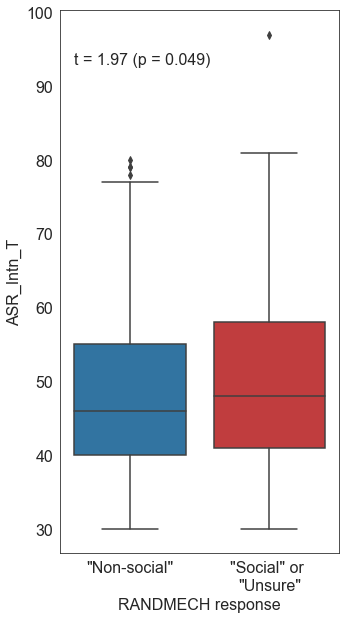

In [133]:
# Create a new variable denoting subjects who responded either "yes" or "unsure"
data["rand_mech_yesorunsure"] = data["rand_mech_response"] > 0

y = "ASR_Intn_T"

fig, ax = plt.subplots(figsize=(5,10))

sns.set_palette(["tab:blue", "tab:red"])
ax = sns.boxplot(x="rand_mech_yesorunsure", y=y, data=data)
ax.set_xlabel("RANDMECH response")
ax.set_xticklabels(["\"Non-social\"", "\"Social\" or \n\"Unsure\""])

t, p = stats.ttest_ind(data[data["rand_mech_yesorunsure"]==1][y], data[data["rand_mech_yesorunsure"]==0][y], nan_policy='omit')
ax.annotate(f't = {t:.2f} (p = {p:.2g})', xy=(0.05, 0.9), xycoords='axes fraction')

#fig.savefig('../results/RANDMECHresp_vs_ASRIntnT.png')


Look at RT on RANDMECH:

In [ ]:
data = data.join(all_trial_data[all_trial_data["movie"]=="Random mechanical.AVI"]["rt"])
data = data.rename(columns={"rt": "rand_mech_rt"})
data.head()

In [ ]:
g = explore_correlation(x="rand_mech_rt", y="ASR_Intn_T", data=data)

In [ ]:
# Restrict correlation to only subjects that responded "yes" or "unsure"

g = explore_correlation(x="rand_mech_rt", y="ASR_Intn_T", data=data[data["rand_mech_yesorunsure"]==1])

# extra code

In [ ]:

'''# model 1: factors: traits, responses, their interaction
coef_nodes_rand_lr_model1 = []
pval_nodes_rand_lr_model1 = []

# model 2: factor: responses
coef_nodes_rand_lr_model2 = []  
pval_nodes_rand_lr_model2  = []'''

# model 3: factor: responses, traits (no interactions)
coef_nodes_fish_lr_model3 = []  
pval_nodes_fish_lr_model3  = []

print_term = True
for n in nodes_traits[1]: # FISHING 
    if n% 50 ==0:
        print('node',n)

    fMRI_data = pd.DataFrame({'Subject':sub_id_all,'slopeReg_node':coef_slope_rand[:,n], 'responses':responses[:,4]})
    fMRI_data.set_index("Subject", inplace=True)
    data = fMRI_data.join(behav_data, how='inner') # join betas and trait info
    data.reset_index(inplace=True)
    data = data.loc[:,['Subject','slopeReg_node','responses','ASR_Intn_T']]
    
    d = data.loc[(data['responses']==0)|(data['responses']==1),:]
    ind = (~np.isnan(d['slopeReg_node'])) & (~np.isnan(d['ASR_Intn_T'])) & (~np.isnan(d['responses']))
    d = d.loc[ind,:]
    
    '''model1 = Lm("slopeReg_node ~  responses", data=d)
    model1.fit(summary = False, verbose = False)
    
    model2 = Lm("slopeReg_node ~  responses + ASR_Intn_T", data=d)
    model2.fit(summary = False, verbose = False)'''

    model3 = Lm("slopeReg_node ~  responses + ASR_Intn_T + responses*ASR_Intn_T", data=d)
    model3.fit(summary = False, verbose = False)
    #model.fit(factors={"response":["Social","Unsure"]},summary = False, verbose = False) # Unsure > Social
    

    if print_term == True:
        print_term = False
        print('node_ind',n)
        '''print(model1.fit())#factors={"response":["Social","Unsure"]}))
        print(model2.fit())'''
        print(model3.fit())

    '''coef_nodes_rand_lr_model1.append([n] + [model1.coefs['Estimate'][1]] )
    pval_nodes_rand_lr_model1.append([n] + [model1.coefs['P-val'][1]]    )
    
    coef_nodes_rand_lr_model2.append([n] + [model2.coefs['Estimate'][i] for i in np.arange(1,3)])
    pval_nodes_rand_lr_model2.append([n] + [model2.coefs['P-val'][i] for i in np.arange(1,3)])'''
    
    #intercept,coef_resp,coef_trait,interaxn_resp_trait = [model3.coefs['Estimate'][i] for i in range(4)]
    coef_nodes_fish_lr_model3.append([n] + [model3.coefs['Estimate'][i] for i in np.arange(1,4)])
    pval_nodes_fish_lr_model3.append([n] + [model3.coefs['P-val'][i] for i in np.arange(1,4)])
    
coef_nodes_fish_lr_model3,pval_nodes_fish_lr_model3 = [np.array(i) for i in [coef_nodes_fish_lr_model3,pval_nodes_fish_lr_model3]]
'''coef_nodes_rand_lr_model1,pval_nodes_rand_lr_model1,coef_nodes_rand_lr_model2,pval_nodes_rand_lr_model2,\
coef_nodes_rand_lr_model3,pval_nodes_rand_lr_model3 = [np.array(i) for i in [coef_nodes_rand_lr_model1,pval_nodes_rand_lr_model1,coef_nodes_rand_lr_model2,pval_nodes_rand_lr_model2,\
coef_nodes_rand_lr_model3,pval_nodes_rand_lr_model3]]'''

#pval_nodes_fdr_rand_lr_model2 = []
pval_nodes_fdr_fish_lr_model3 = []

for ind in range(3):
    pval_nodes_fdr_fish_lr_model3.append(lsu(pval_nodes_fish_lr_model3[:,ind+1],q=.05))


sig_interaction_node_inds_fish =  [int(i) for i in np.where(pval_nodes_fdr_fish_lr_model3[2])[0]]
print(sig_interaction_node_inds_fish)
fish_sig_interaction_nodes = np.array([nodes_traits[0][sig_interaction_node_inds_fish],coef_nodes_fish_lr_model3[sig_interaction_node_inds_fish,3]]).T
fish_sig_interaction_nodes